In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Any results you write to the current directory are saved as output.

In [107]:
#matplotlib este folosit pentru a realiza grafice
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [38]:
df = pd.read_csv("titanic.csv")

In [36]:
df.head()

Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket Title  Family_Size  
0       3    male      1       0.0         A/5 21171    Mr            1  
1       1  female      1       1.0          PC 17599   Mrs            1  
2       3  female      0       1.0  STON/O2. 3101282  Miss            0  
3       1  female      1       1.0            113803   Mrs            1  
4       3    male      0       0.0            373450    Mr            0

pandas_profiling - o librărie ce oferă o analiză automată a setului de date: distributii, tipuri de variabile, valori și o serie intreaga de informatii aditionale.
Pentru a o putea folosi trebuie să ștergem libraria default din colab și să instalăm o versiune specifică. 
După instalare trebuie să facem restart la runtime.

In [6]:
from pandas_profiling import ProfileReport

/home/ioana/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
prof=ProfileReport(df)
df = df.fillna(0)

In [8]:
#Statisticile pot fi salvate În format html
prof.to_file(output_file='titanic.html')

In [9]:
prof

In [10]:
#Pentru seturi de date mari este indicat să folosim versiunea minimală a librăriei
prof=ProfileReport(df,minimal=True)

In [0]:
prof.to_file(output_file='titanic-min.html')

In [0]:
prof

In [108]:
#Selectăm datele de intrare in retea eliminand ultima coloană din csv
from sklearn.preprocessing import LabelBinarizer
df = pd.read_csv("titanic.csv")
encoder = LabelBinarizer()

df["Sex"] = np.where(df["Sex"] == "female", 1, 0)
#print(encoder.classes)
#print(df["Title"])
X = df.drop(["Cabin", "Survived", "Name", "Title", "Embarked", "Ticket"], axis=1)
title = encoder.fit_transform(df["Title"])
print(X)
X = pd.concat([X, pd.DataFrame(title)], axis=1)
print(X)
#obținem etichetele pentru date salvand ultima coloana
y = df['Survived']



      Age     Fare  Parch  PassengerId  Pclass  Sex  SibSp  Family_Size
0    22.0   7.2500      0            1       3    0      1            1
1    38.0  71.2833      0            2       1    1      1            1
2    26.0   7.9250      0            3       3    1      0            0
3    35.0  53.1000      0            4       1    1      1            1
4    35.0   8.0500      0            5       3    0      0            0
..    ...      ...    ...          ...     ...  ...    ...          ...
886  27.0  13.0000      0          887       2    0      0            0
887  19.0  30.0000      0          888       1    1      0            0
888  22.0  23.4500      2          889       3    1      1            3
889  26.0  30.0000      0          890       1    0      0            0
890  32.0   7.7500      0          891       3    0      0            0

[891 rows x 8 columns]
      Age     Fare  Parch  PassengerId  Pclass  Sex  SibSp  Family_Size  0  1  \
0    22.0   7.2500      0      

In [109]:
#folosim o functie din sklearn ce creaza seturi de date pentru antrenare si validare
from sklearn.model_selection import train_test_split

In [110]:
#primim ca output seturile de date corespunzatoare.
#Test size ne spune cat de mare procentual sa avem setul de validare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [111]:
#Verificam distributia etichetelor de 0 si 1.
#Suma etichetelor ne da numarul de intrari cu 1.
#Ideal ar trebui sa avem o distributie echilibrata intre cele 2 valori
sum(y_train), len(y_train)

(272.0, 712)

In [112]:
sum(y_test), len(y_test)

(70.0, 179)

In [113]:
#Pentru normalizarea datelor folosim MinMaxScaler din sklearn
from sklearn.preprocessing import MinMaxScaler

In [114]:
X_train


Age     Fare  Parch  PassengerId  Pclass  Sex  SibSp  Family_Size  0  1  \
431  35.5  16.1000      0          432       3    1      1            1  0  0   
302  19.0   0.0000      0          303       3    0      0            0  0  0   
432  42.0  26.0000      0          433       2    1      1            1  0  0   
166  35.5  55.0000      1          167       1    1      0            1  0  0   
709   4.0  15.2458      1          710       3    0      1            2  0  1   
..    ...      ...    ...          ...     ...  ...    ...          ... .. ..   
2    26.0   7.9250      0            3       3    1      0            0  0  0   
640  20.0   7.8542      0          641       3    0      0            0  0  0   
381   1.0  15.7417      2          382       3    1      0            2  0  0   
22   15.0   8.0292      0           23       3    1      0            0  0  0   
506  33.0  26.0000      2          507       2    1      0            2  0  0   

     2  3  4  5  
431  0  0  1  0  
302  0  1  0  0  
432  0  0  1  0  
166  0  0  1  0  
709  0  0  0  0  
..  .. .. .. ..  
2    1  0  0  0  
640  0  1  0  0  
381  1  0  0  0  
22   1  0  0  0  
506  0  0  1  0  

[712 rows x 14 columns]

In [115]:
y_train

431    1.0
302    0.0
432    1.0
166    1.0
709    1.0
      ... 
2      1.0
640    0.0
381    1.0
22     1.0
506    1.0
Name: Survived, Length: 712, dtype: float64

In [116]:
# Functia va translata fiecare feature in parte in intervalul (-1,1)
# Funcția practic relizează următoarele
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min


sc = MinMaxScaler((-1, 1))

In [117]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
X_test

array([[-0.46779016, -0.96156456, -1.        , ...,  1.        ,
        -1.        , -1.        ],
       [-0.03288937, -0.94925138, -1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.52215276, -0.68906711, -0.33333333, ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-0.19597717, -0.96981121, -1.        , ...,  1.        ,
        -1.        , -1.        ],
       [-0.35906496, -0.72947082, -1.        , ..., -1.        ,
         1.        , -1.        ],
       [-0.19597717, -0.95901073, -1.        , ...,  1.        ,
        -1.        , -1.        ]])

In [119]:
import torch
from torch import nn, optim

In [120]:
X_train.shape

(712, 14)

In [121]:
y_train.shape

(712,)

In [122]:
X_test.shape

(179, 14)

In [123]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.values).long()
y_test = torch.tensor(y_test.values).long()

In [124]:
class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()

        #Sequential oferă o alternativă mai estetică a codului
        #Rețeaua noastră are 2 neuroni pentru output. 
        #Unul va prezice probabilitatea pentru cazul afirmativ al bolii, iar celălalt va prezice probabilitatea cazului negativ al bolii.
        self.sequential= nn.Sequential(
            nn.Linear(14,100),
            nn.ReLU(),
            nn.Linear(100, 60),
            nn.ReLU(),
            nn.Linear(60, 2)
        )


    def forward(self, x):
        return self.sequential(x)

In [125]:
net = HeartDiseaseNN()

In [126]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
# CrossEntropyLoss este folosit adeseori in problemele de clasificare
# Acesta este compus din functia SoftMax și NLLLoss
# Softmax - Mapează elementele din Tensor in intervalul [0,1] și face ca suma lor să fie 1. O functie foarte utilă atunci cand vrem sa calculam probabilitati dintr-un Tensor.
# NLLLoss - negative log likelihood loss, functie folosită adeseori in problemele de clasificare
criterion = nn.CrossEntropyLoss()

In [127]:
#Colectăm loss-urile din antrenare pentru a le plota ulterior
losses = []

In [128]:
# Colectăm accuratetea pentru a o plota ulterior
accuracies=[]

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
# Training loop
def train(epoch):
    # Setează câteva flaguri în rețeaua neurală. Specific activează Dropout-ul și BatchNormalization dacă este cazul.
    # În exemplul nostru are un rol pur demonstrativ, nefiind necesar.
    net.train()

    #Obținem predictii
    outputs = net(X_train)
    # Compute and print loss
    loss = criterion(outputs, y_train)
    
    losses.append(loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Train Epoch: {epoch} Loss:{loss.item()}")

In [131]:
# Colectăm loss-ul din validare pentru a o plota ulterior
test_losses=[]

In [132]:
def validation():
    #Pune pe off flagurile setate in model.train()
    #Din nou, în exemplul nostru e pur demonstrativ.
    net.eval()

    test_loss=0
    correct = 0

    with torch.no_grad():

        output=net(X_test)

        test_loss= criterion(output, y_test)
        test_losses.append(test_loss.item())

        #Obținem predictiile pentru fiecare linie din setul de validare.
        #Practic ne returnează rezultatul cu cea mai mare probabilitate pentru fiecare intrare din setul de validare 
        pred = output.data.max(1, keepdim=True)[1]

        #Verificăm câte predicții sunt corecte și le însumăm numărul pentru a afla totalul de predicții corecte
        #correct += pred.eq(y_test.data.view_as(pred)).sum()
        #O altă functie din sklearn ne poate ajuta să abstractizăm operatia de mai sus.

        accuracy = accuracy_score(y_test, pred)
        
        print("============")
        print(f"[Validation set] Average loss: {test_loss}, Accuracy: {100 * accuracy}%")
        print("============")

        accuracies.append(accuracy)


In [133]:
#după fiecare epocă de train() verificăm rezultatele pe setul de validare
for epoch in range(10000):
  train(epoch)
  validation()

Train Epoch: 0 Loss:0.7218719720840454
[Validation set] Average loss: 0.7174556255340576, Accuracy: 39.10614525139665%
Train Epoch: 1 Loss:0.7186720371246338
[Validation set] Average loss: 0.7143895626068115, Accuracy: 39.66480446927375%
Train Epoch: 2 Loss:0.715576708316803
[Validation set] Average loss: 0.7114190459251404, Accuracy: 39.66480446927375%
Train Epoch: 3 Loss:0.7125788927078247
[Validation set] Average loss: 0.708545982837677, Accuracy: 39.66480446927375%
Train Epoch: 4 Loss:0.7096821069717407
[Validation set] Average loss: 0.7057560682296753, Accuracy: 40.78212290502793%
Train Epoch: 5 Loss:0.7068713307380676
[Validation set] Average loss: 0.703048825263977, Accuracy: 41.899441340782126%
Train Epoch: 6 Loss:0.7041476368904114
[Validation set] Average loss: 0.7004177570343018, Accuracy: 43.01675977653631%
Train Epoch: 7 Loss:0.7015050053596497
[Validation set] Average loss: 0.6978639960289001, Accuracy: 45.81005586592179%
Train Epoch: 8 Loss:0.6989421248435974
[Validation

[Validation set] Average loss: 0.6033849120140076, Accuracy: 70.39106145251397%
Train Epoch: 69 Loss:0.6067821383476257
[Validation set] Average loss: 0.602323055267334, Accuracy: 70.39106145251397%
Train Epoch: 70 Loss:0.6057988405227661
[Validation set] Average loss: 0.6012699604034424, Accuracy: 71.50837988826815%
Train Epoch: 71 Loss:0.6048253774642944
[Validation set] Average loss: 0.6002235412597656, Accuracy: 71.50837988826815%
Train Epoch: 72 Loss:0.6038618683815002
[Validation set] Average loss: 0.5991837978363037, Accuracy: 71.50837988826815%
Train Epoch: 73 Loss:0.6029077172279358
[Validation set] Average loss: 0.5981535911560059, Accuracy: 72.06703910614524%
Train Epoch: 74 Loss:0.6019622683525085
[Validation set] Average loss: 0.5971325635910034, Accuracy: 72.06703910614524%
Train Epoch: 75 Loss:0.6010271310806274
[Validation set] Average loss: 0.5961188673973083, Accuracy: 72.06703910614524%
Train Epoch: 76 Loss:0.6001009345054626
[Validation set] Average loss: 0.59511041

[Validation set] Average loss: 0.5411126613616943, Accuracy: 79.88826815642457%
Train Epoch: 138 Loss:0.5518512725830078
[Validation set] Average loss: 0.540323793888092, Accuracy: 80.44692737430168%
Train Epoch: 139 Loss:0.5511749982833862
[Validation set] Average loss: 0.5395380258560181, Accuracy: 80.44692737430168%
Train Epoch: 140 Loss:0.5505003333091736
[Validation set] Average loss: 0.5387558341026306, Accuracy: 80.44692737430168%
Train Epoch: 141 Loss:0.5498294830322266
[Validation set] Average loss: 0.5379763841629028, Accuracy: 80.44692737430168%
Train Epoch: 142 Loss:0.5491604804992676
[Validation set] Average loss: 0.5372000932693481, Accuracy: 80.44692737430168%
Train Epoch: 143 Loss:0.5484943389892578
[Validation set] Average loss: 0.5364285707473755, Accuracy: 79.88826815642457%
Train Epoch: 144 Loss:0.5478317737579346
[Validation set] Average loss: 0.5356603860855103, Accuracy: 79.88826815642457%
Train Epoch: 145 Loss:0.5471721291542053
[Validation set] Average loss: 0.

[Validation set] Average loss: 0.49590155482292175, Accuracy: 80.44692737430168%
Train Epoch: 207 Loss:0.5134566426277161
[Validation set] Average loss: 0.4953939914703369, Accuracy: 80.44692737430168%
Train Epoch: 208 Loss:0.513027548789978
[Validation set] Average loss: 0.4948905110359192, Accuracy: 80.44692737430168%
Train Epoch: 209 Loss:0.5126021504402161
[Validation set] Average loss: 0.4943903088569641, Accuracy: 80.44692737430168%
Train Epoch: 210 Loss:0.5121800303459167
[Validation set] Average loss: 0.49389392137527466, Accuracy: 80.44692737430168%
Train Epoch: 211 Loss:0.5117620229721069
[Validation set] Average loss: 0.49340084195137024, Accuracy: 80.44692737430168%
Train Epoch: 212 Loss:0.5113471746444702
[Validation set] Average loss: 0.4929119646549225, Accuracy: 80.44692737430168%
Train Epoch: 213 Loss:0.5109348297119141
[Validation set] Average loss: 0.49242669343948364, Accuracy: 80.44692737430168%
Train Epoch: 214 Loss:0.5105258226394653
[Validation set] Average loss

[Validation set] Average loss: 0.4679253101348877, Accuracy: 80.44692737430168%
Train Epoch: 281 Loss:0.48995572328567505
[Validation set] Average loss: 0.46765708923339844, Accuracy: 80.44692737430168%
Train Epoch: 282 Loss:0.4897284209728241
[Validation set] Average loss: 0.46739110350608826, Accuracy: 80.44692737430168%
Train Epoch: 283 Loss:0.48950329422950745
[Validation set] Average loss: 0.46712684631347656, Accuracy: 80.44692737430168%
Train Epoch: 284 Loss:0.4892794191837311
[Validation set] Average loss: 0.46686485409736633, Accuracy: 80.44692737430168%
Train Epoch: 285 Loss:0.4890576899051666
[Validation set] Average loss: 0.4666048288345337, Accuracy: 80.44692737430168%
Train Epoch: 286 Loss:0.4888381063938141
[Validation set] Average loss: 0.4663471281528473, Accuracy: 80.44692737430168%
Train Epoch: 287 Loss:0.4886195957660675
[Validation set] Average loss: 0.4660915732383728, Accuracy: 80.44692737430168%
Train Epoch: 288 Loss:0.4884037375450134
[Validation set] Average l

Train Epoch: 344 Loss:0.47844812273979187
[Validation set] Average loss: 0.454413503408432, Accuracy: 80.44692737430168%
Train Epoch: 345 Loss:0.478298544883728
[Validation set] Average loss: 0.4542478919029236, Accuracy: 80.44692737430168%
Train Epoch: 346 Loss:0.4781496822834015
[Validation set] Average loss: 0.4540822207927704, Accuracy: 80.44692737430168%
Train Epoch: 347 Loss:0.4780007600784302
[Validation set] Average loss: 0.4539187252521515, Accuracy: 80.44692737430168%
Train Epoch: 348 Loss:0.47785305976867676
[Validation set] Average loss: 0.4537557363510132, Accuracy: 80.44692737430168%
Train Epoch: 349 Loss:0.47770583629608154
[Validation set] Average loss: 0.45359423756599426, Accuracy: 80.44692737430168%
Train Epoch: 350 Loss:0.47755998373031616
[Validation set] Average loss: 0.4534335732460022, Accuracy: 80.44692737430168%
Train Epoch: 351 Loss:0.47741442918777466
[Validation set] Average loss: 0.4532739520072937, Accuracy: 80.44692737430168%
Train Epoch: 352 Loss:0.4772

Train Epoch: 415 Loss:0.46940916776657104
[Validation set] Average loss: 0.4446287155151367, Accuracy: 80.44692737430168%
Train Epoch: 416 Loss:0.4692988097667694
[Validation set] Average loss: 0.4445141851902008, Accuracy: 80.44692737430168%
Train Epoch: 417 Loss:0.4691885709762573
[Validation set] Average loss: 0.4444000720977783, Accuracy: 80.44692737430168%
Train Epoch: 418 Loss:0.4690788686275482
[Validation set] Average loss: 0.44428616762161255, Accuracy: 80.44692737430168%
Train Epoch: 419 Loss:0.46896877884864807
[Validation set] Average loss: 0.44417235255241394, Accuracy: 80.44692737430168%
Train Epoch: 420 Loss:0.4688590466976166
[Validation set] Average loss: 0.4440593123435974, Accuracy: 80.44692737430168%
Train Epoch: 421 Loss:0.46874943375587463
[Validation set] Average loss: 0.44394731521606445, Accuracy: 80.44692737430168%
Train Epoch: 422 Loss:0.4686402380466461
[Validation set] Average loss: 0.4438360631465912, Accuracy: 80.44692737430168%
Train Epoch: 423 Loss:0.46

Train Epoch: 487 Loss:0.4621933102607727
[Validation set] Average loss: 0.43746283650398254, Accuracy: 80.44692737430168%
Train Epoch: 488 Loss:0.46210187673568726
[Validation set] Average loss: 0.43737706542015076, Accuracy: 80.44692737430168%
Train Epoch: 489 Loss:0.4620107114315033
[Validation set] Average loss: 0.4372917413711548, Accuracy: 80.44692737430168%
Train Epoch: 490 Loss:0.46191951632499695
[Validation set] Average loss: 0.43720680475234985, Accuracy: 80.44692737430168%
Train Epoch: 491 Loss:0.4618282914161682
[Validation set] Average loss: 0.4371214210987091, Accuracy: 80.44692737430168%
Train Epoch: 492 Loss:0.4617373049259186
[Validation set] Average loss: 0.4370366632938385, Accuracy: 80.44692737430168%
Train Epoch: 493 Loss:0.4616463780403137
[Validation set] Average loss: 0.43695178627967834, Accuracy: 80.44692737430168%
Train Epoch: 494 Loss:0.46155551075935364
[Validation set] Average loss: 0.4368678629398346, Accuracy: 80.44692737430168%
Train Epoch: 495 Loss:0.4

[Validation set] Average loss: 0.43269509077072144, Accuracy: 80.44692737430168%
Train Epoch: 550 Loss:0.45681461691856384
[Validation set] Average loss: 0.43262550234794617, Accuracy: 80.44692737430168%
Train Epoch: 551 Loss:0.4567353427410126
[Validation set] Average loss: 0.4325559735298157, Accuracy: 80.44692737430168%
Train Epoch: 552 Loss:0.4566558599472046
[Validation set] Average loss: 0.43248701095581055, Accuracy: 80.44692737430168%
Train Epoch: 553 Loss:0.45657649636268616
[Validation set] Average loss: 0.4324180483818054, Accuracy: 80.44692737430168%
Train Epoch: 554 Loss:0.45649728178977966
[Validation set] Average loss: 0.43234893679618835, Accuracy: 80.44692737430168%
Train Epoch: 555 Loss:0.45641863346099854
[Validation set] Average loss: 0.4322800934314728, Accuracy: 80.44692737430168%
Train Epoch: 556 Loss:0.45633983612060547
[Validation set] Average loss: 0.43221113085746765, Accuracy: 80.44692737430168%
Train Epoch: 557 Loss:0.4562608003616333
[Validation set] Avera

Train Epoch: 612 Loss:0.4521556794643402
[Validation set] Average loss: 0.4286658465862274, Accuracy: 80.44692737430168%
Train Epoch: 613 Loss:0.45208531618118286
[Validation set] Average loss: 0.4286078214645386, Accuracy: 80.44692737430168%
Train Epoch: 614 Loss:0.45201563835144043
[Validation set] Average loss: 0.42855000495910645, Accuracy: 80.44692737430168%
Train Epoch: 615 Loss:0.4519454538822174
[Validation set] Average loss: 0.42849212884902954, Accuracy: 80.44692737430168%
Train Epoch: 616 Loss:0.45187586545944214
[Validation set] Average loss: 0.4284345209598541, Accuracy: 80.44692737430168%
Train Epoch: 617 Loss:0.45180660486221313
[Validation set] Average loss: 0.4283771216869354, Accuracy: 80.44692737430168%
Train Epoch: 618 Loss:0.45173755288124084
[Validation set] Average loss: 0.4283195734024048, Accuracy: 80.44692737430168%
Train Epoch: 619 Loss:0.4516684412956238
[Validation set] Average loss: 0.4282623827457428, Accuracy: 80.44692737430168%
Train Epoch: 620 Loss:0.4

[Validation set] Average loss: 0.42514315247535706, Accuracy: 81.00558659217877%
Train Epoch: 679 Loss:0.44778889417648315
[Validation set] Average loss: 0.4250931143760681, Accuracy: 81.00558659217877%
Train Epoch: 680 Loss:0.4477274715900421
[Validation set] Average loss: 0.4250432550907135, Accuracy: 81.00558659217877%
Train Epoch: 681 Loss:0.44766637682914734
[Validation set] Average loss: 0.42499375343322754, Accuracy: 81.00558659217877%
Train Epoch: 682 Loss:0.4476056396961212
[Validation set] Average loss: 0.4249439835548401, Accuracy: 81.00558659217877%
Train Epoch: 683 Loss:0.4475444555282593
[Validation set] Average loss: 0.4248937964439392, Accuracy: 81.00558659217877%
Train Epoch: 684 Loss:0.4474838674068451
[Validation set] Average loss: 0.4248444139957428, Accuracy: 81.00558659217877%
Train Epoch: 685 Loss:0.44742321968078613
[Validation set] Average loss: 0.4247952699661255, Accuracy: 81.00558659217877%
Train Epoch: 686 Loss:0.4473630487918854
[Validation set] Average lo

Train Epoch: 743 Loss:0.44408750534057617
[Validation set] Average loss: 0.4221237003803253, Accuracy: 81.00558659217877%
Train Epoch: 744 Loss:0.4440334141254425
[Validation set] Average loss: 0.42207980155944824, Accuracy: 81.00558659217877%
Train Epoch: 745 Loss:0.4439781606197357
[Validation set] Average loss: 0.42203637957572937, Accuracy: 81.00558659217877%
Train Epoch: 746 Loss:0.4439241588115692
[Validation set] Average loss: 0.421993225812912, Accuracy: 81.00558659217877%
Train Epoch: 747 Loss:0.4438694417476654
[Validation set] Average loss: 0.4219498038291931, Accuracy: 81.00558659217877%
Train Epoch: 748 Loss:0.4438154697418213
[Validation set] Average loss: 0.4219066798686981, Accuracy: 81.00558659217877%
Train Epoch: 749 Loss:0.44376125931739807
[Validation set] Average loss: 0.4218636155128479, Accuracy: 81.00558659217877%
Train Epoch: 750 Loss:0.4437074065208435
[Validation set] Average loss: 0.4218203127384186, Accuracy: 81.00558659217877%
Train Epoch: 751 Loss:0.44365

Train Epoch: 811 Loss:0.4405750334262848
[Validation set] Average loss: 0.41939249634742737, Accuracy: 80.44692737430168%
Train Epoch: 812 Loss:0.44052654504776
[Validation set] Average loss: 0.41935455799102783, Accuracy: 80.44692737430168%
Train Epoch: 813 Loss:0.44047829508781433
[Validation set] Average loss: 0.4193170964717865, Accuracy: 80.44692737430168%
Train Epoch: 814 Loss:0.4404303729534149
[Validation set] Average loss: 0.41927969455718994, Accuracy: 80.44692737430168%
Train Epoch: 815 Loss:0.440382182598114
[Validation set] Average loss: 0.4192424714565277, Accuracy: 80.44692737430168%
Train Epoch: 816 Loss:0.4403338134288788
[Validation set] Average loss: 0.4192051291465759, Accuracy: 80.44692737430168%
Train Epoch: 817 Loss:0.4402865171432495
[Validation set] Average loss: 0.41916805505752563, Accuracy: 80.44692737430168%
Train Epoch: 818 Loss:0.4402385354042053
[Validation set] Average loss: 0.41913071274757385, Accuracy: 80.44692737430168%
Train Epoch: 819 Loss:0.44019

Train Epoch: 877 Loss:0.43748316168785095
[Validation set] Average loss: 0.41704580187797546, Accuracy: 80.44692737430168%
Train Epoch: 878 Loss:0.4374379813671112
[Validation set] Average loss: 0.4170123338699341, Accuracy: 80.44692737430168%
Train Epoch: 879 Loss:0.4373933672904968
[Validation set] Average loss: 0.41697901487350464, Accuracy: 80.44692737430168%
Train Epoch: 880 Loss:0.4373488128185272
[Validation set] Average loss: 0.4169457256793976, Accuracy: 80.44692737430168%
Train Epoch: 881 Loss:0.4373037815093994
[Validation set] Average loss: 0.41691240668296814, Accuracy: 80.44692737430168%
Train Epoch: 882 Loss:0.43725940585136414
[Validation set] Average loss: 0.4168793559074402, Accuracy: 80.44692737430168%
Train Epoch: 883 Loss:0.43721500039100647
[Validation set] Average loss: 0.41684621572494507, Accuracy: 80.44692737430168%
Train Epoch: 884 Loss:0.43717026710510254
[Validation set] Average loss: 0.41681304574012756, Accuracy: 80.44692737430168%
Train Epoch: 885 Loss:0

Train Epoch: 949 Loss:0.4343813359737396
[Validation set] Average loss: 0.41478314995765686, Accuracy: 81.00558659217877%
Train Epoch: 950 Loss:0.43434014916419983
[Validation set] Average loss: 0.4147535264492035, Accuracy: 81.00558659217877%
Train Epoch: 951 Loss:0.4342990517616272
[Validation set] Average loss: 0.4147239625453949, Accuracy: 81.00558659217877%
Train Epoch: 952 Loss:0.4342576265335083
[Validation set] Average loss: 0.41469457745552063, Accuracy: 81.00558659217877%
Train Epoch: 953 Loss:0.4342166483402252
[Validation set] Average loss: 0.41466495394706726, Accuracy: 81.00558659217877%
Train Epoch: 954 Loss:0.4341754615306854
[Validation set] Average loss: 0.4146355986595154, Accuracy: 81.00558659217877%
Train Epoch: 955 Loss:0.43413427472114563
[Validation set] Average loss: 0.41460615396499634, Accuracy: 81.00558659217877%
Train Epoch: 956 Loss:0.4340933561325073
[Validation set] Average loss: 0.4145771265029907, Accuracy: 81.00558659217877%
Train Epoch: 957 Loss:0.43

[Validation set] Average loss: 0.4129381775856018, Accuracy: 81.00558659217877%
Train Epoch: 1016 Loss:0.43168482184410095
[Validation set] Average loss: 0.4129117429256439, Accuracy: 81.00558659217877%
Train Epoch: 1017 Loss:0.4316461682319641
[Validation set] Average loss: 0.41288530826568604, Accuracy: 81.00558659217877%
Train Epoch: 1018 Loss:0.4316069781780243
[Validation set] Average loss: 0.41285911202430725, Accuracy: 81.00558659217877%
Train Epoch: 1019 Loss:0.4315674901008606
[Validation set] Average loss: 0.4128328859806061, Accuracy: 81.00558659217877%
Train Epoch: 1020 Loss:0.4315289258956909
[Validation set] Average loss: 0.41280651092529297, Accuracy: 81.00558659217877%
Train Epoch: 1021 Loss:0.43149009346961975
[Validation set] Average loss: 0.4127804934978485, Accuracy: 81.00558659217877%
Train Epoch: 1022 Loss:0.4314514696598053
[Validation set] Average loss: 0.4127541780471802, Accuracy: 81.00558659217877%
Train Epoch: 1023 Loss:0.43141210079193115
[Validation set] A

[Validation set] Average loss: 0.4112257659435272, Accuracy: 81.56424581005587%
Train Epoch: 1085 Loss:0.4290628731250763
[Validation set] Average loss: 0.41120249032974243, Accuracy: 81.56424581005587%
Train Epoch: 1086 Loss:0.42902621626853943
[Validation set] Average loss: 0.41117891669273376, Accuracy: 81.56424581005587%
Train Epoch: 1087 Loss:0.428989440202713
[Validation set] Average loss: 0.41115549206733704, Accuracy: 81.56424581005587%
Train Epoch: 1088 Loss:0.4289529323577881
[Validation set] Average loss: 0.4111320972442627, Accuracy: 81.56424581005587%
Train Epoch: 1089 Loss:0.4289161264896393
[Validation set] Average loss: 0.4111088216304779, Accuracy: 81.56424581005587%
Train Epoch: 1090 Loss:0.4288795590400696
[Validation set] Average loss: 0.4110856354236603, Accuracy: 81.56424581005587%
Train Epoch: 1091 Loss:0.4288429021835327
[Validation set] Average loss: 0.4110621511936188, Accuracy: 81.56424581005587%
Train Epoch: 1092 Loss:0.4288061857223511
[Validation set] Aver

[Validation set] Average loss: 0.40975499153137207, Accuracy: 81.56424581005587%
Train Epoch: 1151 Loss:0.4267003834247589
[Validation set] Average loss: 0.4097342789173126, Accuracy: 81.56424581005587%
Train Epoch: 1152 Loss:0.4266657829284668
[Validation set] Average loss: 0.4097134470939636, Accuracy: 81.56424581005587%
Train Epoch: 1153 Loss:0.4266308844089508
[Validation set] Average loss: 0.4096929132938385, Accuracy: 81.56424581005587%
Train Epoch: 1154 Loss:0.42659613490104675
[Validation set] Average loss: 0.40967193245887756, Accuracy: 81.56424581005587%
Train Epoch: 1155 Loss:0.42656171321868896
[Validation set] Average loss: 0.4096510410308838, Accuracy: 81.56424581005587%
Train Epoch: 1156 Loss:0.4265269935131073
[Validation set] Average loss: 0.4096304476261139, Accuracy: 81.56424581005587%
Train Epoch: 1157 Loss:0.4264926612377167
[Validation set] Average loss: 0.40960970520973206, Accuracy: 81.56424581005587%
Train Epoch: 1158 Loss:0.42645755410194397
[Validation set] A

Train Epoch: 1208 Loss:0.4247724115848541
[Validation set] Average loss: 0.4086047112941742, Accuracy: 81.00558659217877%
Train Epoch: 1209 Loss:0.4247397482395172
[Validation set] Average loss: 0.4085858166217804, Accuracy: 81.00558659217877%
Train Epoch: 1210 Loss:0.4247072637081146
[Validation set] Average loss: 0.40856653451919556, Accuracy: 81.00558659217877%
Train Epoch: 1211 Loss:0.4246746003627777
[Validation set] Average loss: 0.4085470736026764, Accuracy: 81.00558659217877%
Train Epoch: 1212 Loss:0.42464205622673035
[Validation set] Average loss: 0.408528208732605, Accuracy: 81.00558659217877%
Train Epoch: 1213 Loss:0.42460915446281433
[Validation set] Average loss: 0.408509224653244, Accuracy: 81.00558659217877%
Train Epoch: 1214 Loss:0.4245764911174774
[Validation set] Average loss: 0.4084901511669159, Accuracy: 81.00558659217877%
Train Epoch: 1215 Loss:0.4245438277721405
[Validation set] Average loss: 0.4084707498550415, Accuracy: 81.00558659217877%
Train Epoch: 1216 Loss:

Train Epoch: 1266 Loss:0.42289823293685913
[Validation set] Average loss: 0.4075421392917633, Accuracy: 81.00558659217877%
Train Epoch: 1267 Loss:0.42286601662635803
[Validation set] Average loss: 0.40752461552619934, Accuracy: 81.00558659217877%
Train Epoch: 1268 Loss:0.42283421754837036
[Validation set] Average loss: 0.4075070917606354, Accuracy: 81.00558659217877%
Train Epoch: 1269 Loss:0.4228024482727051
[Validation set] Average loss: 0.40748950839042664, Accuracy: 81.00558659217877%
Train Epoch: 1270 Loss:0.4227708876132965
[Validation set] Average loss: 0.4074718952178955, Accuracy: 81.00558659217877%
Train Epoch: 1271 Loss:0.4227384924888611
[Validation set] Average loss: 0.407454252243042, Accuracy: 81.00558659217877%
Train Epoch: 1272 Loss:0.42270681262016296
[Validation set] Average loss: 0.407436728477478, Accuracy: 81.00558659217877%
Train Epoch: 1273 Loss:0.4226750135421753
[Validation set] Average loss: 0.4074191749095917, Accuracy: 81.00558659217877%
Train Epoch: 1274 Lo

[Validation set] Average loss: 0.4065346419811249, Accuracy: 81.00558659217877%
Train Epoch: 1327 Loss:0.42099064588546753
[Validation set] Average loss: 0.4065183401107788, Accuracy: 81.00558659217877%
Train Epoch: 1328 Loss:0.42096006870269775
[Validation set] Average loss: 0.4065023362636566, Accuracy: 81.00558659217877%
Train Epoch: 1329 Loss:0.42092961072921753
[Validation set] Average loss: 0.40648630261421204, Accuracy: 81.00558659217877%
Train Epoch: 1330 Loss:0.42089948058128357
[Validation set] Average loss: 0.4064701795578003, Accuracy: 81.00558659217877%
Train Epoch: 1331 Loss:0.42086878418922424
[Validation set] Average loss: 0.406454473733902, Accuracy: 81.00558659217877%
Train Epoch: 1332 Loss:0.4208381772041321
[Validation set] Average loss: 0.4064383804798126, Accuracy: 81.00558659217877%
Train Epoch: 1333 Loss:0.42080792784690857
[Validation set] Average loss: 0.40642249584198, Accuracy: 81.00558659217877%
Train Epoch: 1334 Loss:0.4207775294780731
[Validation set] Ave

Train Epoch: 1384 Loss:0.41928187012672424
[Validation set] Average loss: 0.4056626558303833, Accuracy: 81.00558659217877%
Train Epoch: 1385 Loss:0.4192526638507843
[Validation set] Average loss: 0.4056490957736969, Accuracy: 81.00558659217877%
Train Epoch: 1386 Loss:0.41922321915626526
[Validation set] Average loss: 0.40563490986824036, Accuracy: 81.00558659217877%
Train Epoch: 1387 Loss:0.4191940426826477
[Validation set] Average loss: 0.405620813369751, Accuracy: 81.00558659217877%
Train Epoch: 1388 Loss:0.4191645383834839
[Validation set] Average loss: 0.4056072235107422, Accuracy: 81.00558659217877%
Train Epoch: 1389 Loss:0.41913527250289917
[Validation set] Average loss: 0.40559324622154236, Accuracy: 81.00558659217877%
Train Epoch: 1390 Loss:0.419106125831604
[Validation set] Average loss: 0.4055793285369873, Accuracy: 81.00558659217877%
Train Epoch: 1391 Loss:0.4190772771835327
[Validation set] Average loss: 0.4055657982826233, Accuracy: 81.00558659217877%
Train Epoch: 1392 Los

[Validation set] Average loss: 0.40473514795303345, Accuracy: 81.00558659217877%
Train Epoch: 1454 Loss:0.41727885603904724
[Validation set] Average loss: 0.4047226011753082, Accuracy: 81.00558659217877%
Train Epoch: 1455 Loss:0.4172508120536804
[Validation set] Average loss: 0.4047092795372009, Accuracy: 81.00558659217877%
Train Epoch: 1456 Loss:0.41722261905670166
[Validation set] Average loss: 0.40469640493392944, Accuracy: 81.00558659217877%
Train Epoch: 1457 Loss:0.4171944558620453
[Validation set] Average loss: 0.40468376874923706, Accuracy: 81.00558659217877%
Train Epoch: 1458 Loss:0.4171660244464874
[Validation set] Average loss: 0.40467074513435364, Accuracy: 81.00558659217877%
Train Epoch: 1459 Loss:0.4171377122402191
[Validation set] Average loss: 0.40465766191482544, Accuracy: 81.00558659217877%
Train Epoch: 1460 Loss:0.417109876871109
[Validation set] Average loss: 0.40464475750923157, Accuracy: 81.00558659217877%
Train Epoch: 1461 Loss:0.4170818030834198
[Validation set] 

Train Epoch: 1550 Loss:0.4146326184272766
[Validation set] Average loss: 0.4035071134567261, Accuracy: 81.56424581005587%
Train Epoch: 1551 Loss:0.4146055579185486
[Validation set] Average loss: 0.40349647402763367, Accuracy: 81.56424581005587%
Train Epoch: 1552 Loss:0.41457846760749817
[Validation set] Average loss: 0.40348637104034424, Accuracy: 81.56424581005587%
Train Epoch: 1553 Loss:0.4145511984825134
[Validation set] Average loss: 0.4034757614135742, Accuracy: 81.56424581005587%
Train Epoch: 1554 Loss:0.41452497243881226
[Validation set] Average loss: 0.4034654498100281, Accuracy: 81.56424581005587%
Train Epoch: 1555 Loss:0.4144979417324066
[Validation set] Average loss: 0.4034552574157715, Accuracy: 81.56424581005587%
Train Epoch: 1556 Loss:0.4144708812236786
[Validation set] Average loss: 0.40344515442848206, Accuracy: 81.56424581005587%
Train Epoch: 1557 Loss:0.41444453597068787
[Validation set] Average loss: 0.40343526005744934, Accuracy: 81.56424581005587%
Train Epoch: 1558

Train Epoch: 1637 Loss:0.41237178444862366
[Validation set] Average loss: 0.402710884809494, Accuracy: 81.56424581005587%
Train Epoch: 1638 Loss:0.41234707832336426
[Validation set] Average loss: 0.4027027189731598, Accuracy: 81.56424581005587%
Train Epoch: 1639 Loss:0.4123218357563019
[Validation set] Average loss: 0.4026944041252136, Accuracy: 81.56424581005587%
Train Epoch: 1640 Loss:0.41229677200317383
[Validation set] Average loss: 0.40268561244010925, Accuracy: 81.56424581005587%
Train Epoch: 1641 Loss:0.4122714698314667
[Validation set] Average loss: 0.4026772677898407, Accuracy: 81.56424581005587%
Train Epoch: 1642 Loss:0.4122464060783386
[Validation set] Average loss: 0.40266886353492737, Accuracy: 81.56424581005587%
Train Epoch: 1643 Loss:0.41222134232521057
[Validation set] Average loss: 0.4026603400707245, Accuracy: 81.56424581005587%
Train Epoch: 1644 Loss:0.4121963083744049
[Validation set] Average loss: 0.4026518166065216, Accuracy: 81.56424581005587%
Train Epoch: 1645 L

[Validation set] Average loss: 0.40216243267059326, Accuracy: 81.56424581005587%
Train Epoch: 1711 Loss:0.41057509183883667
[Validation set] Average loss: 0.40215590596199036, Accuracy: 81.56424581005587%
Train Epoch: 1712 Loss:0.41055169701576233
[Validation set] Average loss: 0.40214961767196655, Accuracy: 81.56424581005587%
Train Epoch: 1713 Loss:0.4105280339717865
[Validation set] Average loss: 0.4021432399749756, Accuracy: 81.56424581005587%
Train Epoch: 1714 Loss:0.41050487756729126
[Validation set] Average loss: 0.40213677287101746, Accuracy: 81.56424581005587%
Train Epoch: 1715 Loss:0.4104810655117035
[Validation set] Average loss: 0.4021305441856384, Accuracy: 81.56424581005587%
Train Epoch: 1716 Loss:0.41045811772346497
[Validation set] Average loss: 0.4021250009536743, Accuracy: 81.56424581005587%
Train Epoch: 1717 Loss:0.4104350209236145
[Validation set] Average loss: 0.4021188020706177, Accuracy: 81.56424581005587%
Train Epoch: 1718 Loss:0.410411536693573
[Validation set] 

[Validation set] Average loss: 0.4016799032688141, Accuracy: 81.56424581005587%
Train Epoch: 1791 Loss:0.4087439179420471
[Validation set] Average loss: 0.4016738831996918, Accuracy: 81.56424581005587%
Train Epoch: 1792 Loss:0.4087218940258026
[Validation set] Average loss: 0.4016680121421814, Accuracy: 81.56424581005587%
Train Epoch: 1793 Loss:0.40869975090026855
[Validation set] Average loss: 0.40166208148002625, Accuracy: 81.56424581005587%
Train Epoch: 1794 Loss:0.40867799520492554
[Validation set] Average loss: 0.40165621042251587, Accuracy: 81.56424581005587%
Train Epoch: 1795 Loss:0.40865620970726013
[Validation set] Average loss: 0.40165063738822937, Accuracy: 81.56424581005587%
Train Epoch: 1796 Loss:0.40863415598869324
[Validation set] Average loss: 0.4016447365283966, Accuracy: 81.56424581005587%
Train Epoch: 1797 Loss:0.408612459897995
[Validation set] Average loss: 0.4016389548778534, Accuracy: 81.56424581005587%
Train Epoch: 1798 Loss:0.40859055519104004
[Validation set] 

[Validation set] Average loss: 0.4012363851070404, Accuracy: 82.12290502793296%
Train Epoch: 1880 Loss:0.4068624973297119
[Validation set] Average loss: 0.40123242139816284, Accuracy: 82.12290502793296%
Train Epoch: 1881 Loss:0.4068426489830017
[Validation set] Average loss: 0.40122857689857483, Accuracy: 82.12290502793296%
Train Epoch: 1882 Loss:0.4068223834037781
[Validation set] Average loss: 0.4012245237827301, Accuracy: 82.12290502793296%
Train Epoch: 1883 Loss:0.40680256485939026
[Validation set] Average loss: 0.40122103691101074, Accuracy: 82.12290502793296%
Train Epoch: 1884 Loss:0.40678247809410095
[Validation set] Average loss: 0.40121710300445557, Accuracy: 82.12290502793296%
Train Epoch: 1885 Loss:0.4067622125148773
[Validation set] Average loss: 0.4012133777141571, Accuracy: 82.12290502793296%
Train Epoch: 1886 Loss:0.4067420959472656
[Validation set] Average loss: 0.4012095332145691, Accuracy: 82.12290502793296%
Train Epoch: 1887 Loss:0.40672242641448975
[Validation set] 

Train Epoch: 1936 Loss:0.4057532846927643
[Validation set] Average loss: 0.4010464549064636, Accuracy: 81.56424581005587%
Train Epoch: 1937 Loss:0.40573397278785706
[Validation set] Average loss: 0.4010433554649353, Accuracy: 81.56424581005587%
Train Epoch: 1938 Loss:0.40571486949920654
[Validation set] Average loss: 0.4010404348373413, Accuracy: 81.56424581005587%
Train Epoch: 1939 Loss:0.405695378780365
[Validation set] Average loss: 0.40103745460510254, Accuracy: 81.56424581005587%
Train Epoch: 1940 Loss:0.4056759178638458
[Validation set] Average loss: 0.40103456377983093, Accuracy: 81.56424581005587%
Train Epoch: 1941 Loss:0.4056565761566162
[Validation set] Average loss: 0.40103140473365784, Accuracy: 81.56424581005587%
Train Epoch: 1942 Loss:0.4056375026702881
[Validation set] Average loss: 0.4010286331176758, Accuracy: 81.56424581005587%
Train Epoch: 1943 Loss:0.40561792254447937
[Validation set] Average loss: 0.4010259509086609, Accuracy: 81.56424581005587%
Train Epoch: 1944 L

[Validation set] Average loss: 0.40085920691490173, Accuracy: 81.56424581005587%
Train Epoch: 2013 Loss:0.40430980920791626
[Validation set] Average loss: 0.4008575975894928, Accuracy: 81.56424581005587%
Train Epoch: 2014 Loss:0.40429216623306274
[Validation set] Average loss: 0.4008557200431824, Accuracy: 81.56424581005587%
Train Epoch: 2015 Loss:0.4042741656303406
[Validation set] Average loss: 0.40085411071777344, Accuracy: 81.56424581005587%
Train Epoch: 2016 Loss:0.4042558968067169
[Validation set] Average loss: 0.4008524715900421, Accuracy: 81.56424581005587%
Train Epoch: 2017 Loss:0.40423819422721863
[Validation set] Average loss: 0.40085113048553467, Accuracy: 81.56424581005587%
Train Epoch: 2018 Loss:0.4042201042175293
[Validation set] Average loss: 0.400849312543869, Accuracy: 81.56424581005587%
Train Epoch: 2019 Loss:0.4042022228240967
[Validation set] Average loss: 0.40084779262542725, Accuracy: 81.56424581005587%
Train Epoch: 2020 Loss:0.4041842222213745
[Validation set] A

[Validation set] Average loss: 0.4007735550403595, Accuracy: 81.56424581005587%
Train Epoch: 2085 Loss:0.40304431319236755
[Validation set] Average loss: 0.40077266097068787, Accuracy: 81.56424581005587%
Train Epoch: 2086 Loss:0.4030272960662842
[Validation set] Average loss: 0.40077170729637146, Accuracy: 81.56424581005587%
Train Epoch: 2087 Loss:0.4030103385448456
[Validation set] Average loss: 0.400770902633667, Accuracy: 81.56424581005587%
Train Epoch: 2088 Loss:0.4029932916164398
[Validation set] Average loss: 0.40077000856399536, Accuracy: 81.56424581005587%
Train Epoch: 2089 Loss:0.4029764235019684
[Validation set] Average loss: 0.40076911449432373, Accuracy: 81.56424581005587%
Train Epoch: 2090 Loss:0.40295958518981934
[Validation set] Average loss: 0.4007682502269745, Accuracy: 81.56424581005587%
Train Epoch: 2091 Loss:0.40294286608695984
[Validation set] Average loss: 0.4007675051689148, Accuracy: 81.56424581005587%
Train Epoch: 2092 Loss:0.40292593836784363
[Validation set] 

Train Epoch: 2191 Loss:0.4013217091560364
[Validation set] Average loss: 0.40074676275253296, Accuracy: 81.56424581005587%
Train Epoch: 2192 Loss:0.4013059735298157
[Validation set] Average loss: 0.40074676275253296, Accuracy: 81.56424581005587%
Train Epoch: 2193 Loss:0.40129029750823975
[Validation set] Average loss: 0.40074700117111206, Accuracy: 81.56424581005587%
Train Epoch: 2194 Loss:0.40127524733543396
[Validation set] Average loss: 0.40074700117111206, Accuracy: 81.56424581005587%
Train Epoch: 2195 Loss:0.4012598693370819
[Validation set] Average loss: 0.40074723958969116, Accuracy: 81.56424581005587%
Train Epoch: 2196 Loss:0.4012441635131836
[Validation set] Average loss: 0.4007473886013031, Accuracy: 81.56424581005587%
Train Epoch: 2197 Loss:0.40122875571250916
[Validation set] Average loss: 0.40074729919433594, Accuracy: 81.56424581005587%
Train Epoch: 2198 Loss:0.4012136161327362
[Validation set] Average loss: 0.4007473886013031, Accuracy: 81.56424581005587%
Train Epoch: 21

Train Epoch: 2260 Loss:0.4002784192562103
[Validation set] Average loss: 0.4007905423641205, Accuracy: 81.56424581005587%
Train Epoch: 2261 Loss:0.40026363730430603
[Validation set] Average loss: 0.4007914960384369, Accuracy: 81.56424581005587%
Train Epoch: 2262 Loss:0.400249183177948
[Validation set] Average loss: 0.4007928967475891, Accuracy: 81.56424581005587%
Train Epoch: 2263 Loss:0.4002344012260437
[Validation set] Average loss: 0.40079376101493835, Accuracy: 81.56424581005587%
Train Epoch: 2264 Loss:0.40021955966949463
[Validation set] Average loss: 0.4007948935031891, Accuracy: 81.56424581005587%
Train Epoch: 2265 Loss:0.40020474791526794
[Validation set] Average loss: 0.40079596638679504, Accuracy: 81.56424581005587%
Train Epoch: 2266 Loss:0.40018993616104126
[Validation set] Average loss: 0.4007974863052368, Accuracy: 81.56424581005587%
Train Epoch: 2267 Loss:0.4001753330230713
[Validation set] Average loss: 0.40079808235168457, Accuracy: 81.56424581005587%
Train Epoch: 2268 

[Validation set] Average loss: 0.40086203813552856, Accuracy: 81.56424581005587%
Train Epoch: 2327 Loss:0.3993111848831177
[Validation set] Average loss: 0.4008636176586151, Accuracy: 81.56424581005587%
Train Epoch: 2328 Loss:0.39929699897766113
[Validation set] Average loss: 0.40086492896080017, Accuracy: 81.56424581005587%
Train Epoch: 2329 Loss:0.39928263425827026
[Validation set] Average loss: 0.40086573362350464, Accuracy: 81.56424581005587%
Train Epoch: 2330 Loss:0.3992685079574585
[Validation set] Average loss: 0.400867223739624, Accuracy: 81.56424581005587%
Train Epoch: 2331 Loss:0.39925482869148254
[Validation set] Average loss: 0.40086832642555237, Accuracy: 81.56424581005587%
Train Epoch: 2332 Loss:0.3992409408092499
[Validation set] Average loss: 0.40086957812309265, Accuracy: 81.56424581005587%
Train Epoch: 2333 Loss:0.39922666549682617
[Validation set] Average loss: 0.40087106823921204, Accuracy: 81.56424581005587%
Train Epoch: 2334 Loss:0.39921244978904724
[Validation se

Train Epoch: 2386 Loss:0.3984990417957306
[Validation set] Average loss: 0.4009489417076111, Accuracy: 81.56424581005587%
Train Epoch: 2387 Loss:0.3984854221343994
[Validation set] Average loss: 0.4009506404399872, Accuracy: 81.56424581005587%
Train Epoch: 2388 Loss:0.3984719216823578
[Validation set] Average loss: 0.40095245838165283, Accuracy: 81.56424581005587%
Train Epoch: 2389 Loss:0.3984585404396057
[Validation set] Average loss: 0.40095412731170654, Accuracy: 81.56424581005587%
Train Epoch: 2390 Loss:0.39844539761543274
[Validation set] Average loss: 0.40095579624176025, Accuracy: 81.56424581005587%
Train Epoch: 2391 Loss:0.3984314203262329
[Validation set] Average loss: 0.40095770359039307, Accuracy: 81.56424581005587%
Train Epoch: 2392 Loss:0.3984183371067047
[Validation set] Average loss: 0.40095946192741394, Accuracy: 81.56424581005587%
Train Epoch: 2393 Loss:0.39840465784072876
[Validation set] Average loss: 0.40096133947372437, Accuracy: 81.56424581005587%
Train Epoch: 239

[Validation set] Average loss: 0.40110138058662415, Accuracy: 81.00558659217877%
Train Epoch: 2464 Loss:0.3974703252315521
[Validation set] Average loss: 0.4011034071445465, Accuracy: 81.00558659217877%
Train Epoch: 2465 Loss:0.3974570333957672
[Validation set] Average loss: 0.40110552310943604, Accuracy: 81.00558659217877%
Train Epoch: 2466 Loss:0.39744433760643005
[Validation set] Average loss: 0.4011074900627136, Accuracy: 81.00558659217877%
Train Epoch: 2467 Loss:0.39743131399154663
[Validation set] Average loss: 0.4011096656322479, Accuracy: 81.00558659217877%
Train Epoch: 2468 Loss:0.3974182605743408
[Validation set] Average loss: 0.4011118412017822, Accuracy: 81.00558659217877%
Train Epoch: 2469 Loss:0.3974052965641022
[Validation set] Average loss: 0.40111351013183594, Accuracy: 81.00558659217877%
Train Epoch: 2470 Loss:0.3973923921585083
[Validation set] Average loss: 0.4011155366897583, Accuracy: 81.00558659217877%
Train Epoch: 2471 Loss:0.3973797857761383
[Validation set] Av

Train Epoch: 2530 Loss:0.39664721488952637
[Validation set] Average loss: 0.40124770998954773, Accuracy: 81.00558659217877%
Train Epoch: 2531 Loss:0.39663490653038025
[Validation set] Average loss: 0.4012497067451477, Accuracy: 81.00558659217877%
Train Epoch: 2532 Loss:0.39662274718284607
[Validation set] Average loss: 0.40125223994255066, Accuracy: 81.00558659217877%
Train Epoch: 2533 Loss:0.39661046862602234
[Validation set] Average loss: 0.4012545049190521, Accuracy: 81.00558659217877%
Train Epoch: 2534 Loss:0.3965982496738434
[Validation set] Average loss: 0.4012569189071655, Accuracy: 81.00558659217877%
Train Epoch: 2535 Loss:0.3965863287448883
[Validation set] Average loss: 0.40125927329063416, Accuracy: 81.00558659217877%
Train Epoch: 2536 Loss:0.39657434821128845
[Validation set] Average loss: 0.40126168727874756, Accuracy: 81.00558659217877%
Train Epoch: 2537 Loss:0.39656195044517517
[Validation set] Average loss: 0.401263952255249, Accuracy: 81.00558659217877%
Train Epoch: 25

Train Epoch: 2600 Loss:0.39579254388809204
[Validation set] Average loss: 0.40141987800598145, Accuracy: 81.00558659217877%
Train Epoch: 2601 Loss:0.39578011631965637
[Validation set] Average loss: 0.40142276883125305, Accuracy: 81.00558659217877%
Train Epoch: 2602 Loss:0.39576786756515503
[Validation set] Average loss: 0.40142545104026794, Accuracy: 81.00558659217877%
Train Epoch: 2603 Loss:0.3957553803920746
[Validation set] Average loss: 0.40142822265625, Accuracy: 81.00558659217877%
Train Epoch: 2604 Loss:0.39574313163757324
[Validation set] Average loss: 0.4014315605163574, Accuracy: 81.00558659217877%
Train Epoch: 2605 Loss:0.3957310914993286
[Validation set] Average loss: 0.4014340937137604, Accuracy: 81.00558659217877%
Train Epoch: 2606 Loss:0.39571887254714966
[Validation set] Average loss: 0.4014372229576111, Accuracy: 81.00558659217877%
Train Epoch: 2607 Loss:0.39570677280426025
[Validation set] Average loss: 0.40143993496894836, Accuracy: 81.00558659217877%
Train Epoch: 260

[Validation set] Average loss: 0.4016176760196686, Accuracy: 81.00558659217877%
Train Epoch: 2665 Loss:0.3950210213661194
[Validation set] Average loss: 0.4016212522983551, Accuracy: 81.00558659217877%
Train Epoch: 2666 Loss:0.39500945806503296
[Validation set] Average loss: 0.4016244113445282, Accuracy: 81.00558659217877%
Train Epoch: 2667 Loss:0.39499789476394653
[Validation set] Average loss: 0.40162819623947144, Accuracy: 81.00558659217877%
Train Epoch: 2668 Loss:0.39498597383499146
[Validation set] Average loss: 0.40163156390190125, Accuracy: 81.00558659217877%
Train Epoch: 2669 Loss:0.3949747085571289
[Validation set] Average loss: 0.40163499116897583, Accuracy: 81.00558659217877%
Train Epoch: 2670 Loss:0.3949630856513977
[Validation set] Average loss: 0.40163829922676086, Accuracy: 81.00558659217877%
Train Epoch: 2671 Loss:0.39495134353637695
[Validation set] Average loss: 0.40164175629615784, Accuracy: 81.00558659217877%
Train Epoch: 2672 Loss:0.3949398100376129
[Validation set

Train Epoch: 2723 Loss:0.39435842633247375
[Validation set] Average loss: 0.4018196165561676, Accuracy: 81.00558659217877%
Train Epoch: 2724 Loss:0.39434725046157837
[Validation set] Average loss: 0.40182337164878845, Accuracy: 81.00558659217877%
Train Epoch: 2725 Loss:0.3943365216255188
[Validation set] Average loss: 0.4018264412879944, Accuracy: 81.00558659217877%
Train Epoch: 2726 Loss:0.39432528614997864
[Validation set] Average loss: 0.4018300771713257, Accuracy: 81.00558659217877%
Train Epoch: 2727 Loss:0.394314706325531
[Validation set] Average loss: 0.40183359384536743, Accuracy: 81.00558659217877%
Train Epoch: 2728 Loss:0.39430373907089233
[Validation set] Average loss: 0.4018373191356659, Accuracy: 81.00558659217877%
Train Epoch: 2729 Loss:0.39429259300231934
[Validation set] Average loss: 0.4018409848213196, Accuracy: 81.00558659217877%
Train Epoch: 2730 Loss:0.39428213238716125
[Validation set] Average loss: 0.40184444189071655, Accuracy: 81.00558659217877%
Train Epoch: 273

Train Epoch: 2785 Loss:0.39369672536849976
[Validation set] Average loss: 0.40205055475234985, Accuracy: 81.00558659217877%
Train Epoch: 2786 Loss:0.3936862349510193
[Validation set] Average loss: 0.40205416083335876, Accuracy: 81.00558659217877%
Train Epoch: 2787 Loss:0.39367610216140747
[Validation set] Average loss: 0.40205827355384827, Accuracy: 81.00558659217877%
Train Epoch: 2788 Loss:0.39366549253463745
[Validation set] Average loss: 0.40206214785575867, Accuracy: 81.00558659217877%
Train Epoch: 2789 Loss:0.3936552107334137
[Validation set] Average loss: 0.4020662009716034, Accuracy: 81.00558659217877%
Train Epoch: 2790 Loss:0.3936445116996765
[Validation set] Average loss: 0.40206995606422424, Accuracy: 81.00558659217877%
Train Epoch: 2791 Loss:0.39363428950309753
[Validation set] Average loss: 0.4020739197731018, Accuracy: 81.00558659217877%
Train Epoch: 2792 Loss:0.3936240077018738
[Validation set] Average loss: 0.40207788348197937, Accuracy: 81.00558659217877%
Train Epoch: 2

[Validation set] Average loss: 0.4023060202598572, Accuracy: 81.00558659217877%
Train Epoch: 2849 Loss:0.39304283261299133
[Validation set] Average loss: 0.40231019258499146, Accuracy: 81.00558659217877%
Train Epoch: 2850 Loss:0.39303264021873474
[Validation set] Average loss: 0.40231412649154663, Accuracy: 81.00558659217877%
Train Epoch: 2851 Loss:0.39302319288253784
[Validation set] Average loss: 0.4023182988166809, Accuracy: 81.00558659217877%
Train Epoch: 2852 Loss:0.3930131196975708
[Validation set] Average loss: 0.40232235193252563, Accuracy: 81.00558659217877%
Train Epoch: 2853 Loss:0.3930031955242157
[Validation set] Average loss: 0.40232643485069275, Accuracy: 81.00558659217877%
Train Epoch: 2854 Loss:0.3929932117462158
[Validation set] Average loss: 0.4023308753967285, Accuracy: 81.00558659217877%
Train Epoch: 2855 Loss:0.3929835557937622
[Validation set] Average loss: 0.4023348391056061, Accuracy: 81.00558659217877%
Train Epoch: 2856 Loss:0.3929733633995056
[Validation set] 

[Validation set] Average loss: 0.402627557516098, Accuracy: 81.00558659217877%
Train Epoch: 2925 Loss:0.3923090398311615
[Validation set] Average loss: 0.4026316702365875, Accuracy: 81.00558659217877%
Train Epoch: 2926 Loss:0.392299622297287
[Validation set] Average loss: 0.4026358723640442, Accuracy: 81.00558659217877%
Train Epoch: 2927 Loss:0.39229005575180054
[Validation set] Average loss: 0.4026399850845337, Accuracy: 81.00558659217877%
Train Epoch: 2928 Loss:0.39228084683418274
[Validation set] Average loss: 0.4026437997817993, Accuracy: 81.00558659217877%
Train Epoch: 2929 Loss:0.3922710716724396
[Validation set] Average loss: 0.40264761447906494, Accuracy: 81.00558659217877%
Train Epoch: 2930 Loss:0.392261803150177
[Validation set] Average loss: 0.40265172719955444, Accuracy: 81.00558659217877%
Train Epoch: 2931 Loss:0.39225223660469055
[Validation set] Average loss: 0.4026557505130768, Accuracy: 81.00558659217877%
Train Epoch: 2932 Loss:0.3922426998615265
[Validation set] Avera

[Validation set] Average loss: 0.40297967195510864, Accuracy: 81.56424581005587%
Train Epoch: 3012 Loss:0.39150384068489075
[Validation set] Average loss: 0.40298399329185486, Accuracy: 81.56424581005587%
Train Epoch: 3013 Loss:0.3914947807788849
[Validation set] Average loss: 0.4029877781867981, Accuracy: 81.56424581005587%
Train Epoch: 3014 Loss:0.39148563146591187
[Validation set] Average loss: 0.4029923677444458, Accuracy: 81.56424581005587%
Train Epoch: 3015 Loss:0.39147645235061646
[Validation set] Average loss: 0.4029964804649353, Accuracy: 81.56424581005587%
Train Epoch: 3016 Loss:0.39146727323532104
[Validation set] Average loss: 0.4030005931854248, Accuracy: 81.56424581005587%
Train Epoch: 3017 Loss:0.3914583921432495
[Validation set] Average loss: 0.40300461649894714, Accuracy: 81.56424581005587%
Train Epoch: 3018 Loss:0.3914492726325989
[Validation set] Average loss: 0.4030087888240814, Accuracy: 81.56424581005587%
Train Epoch: 3019 Loss:0.39143994450569153
[Validation set]

[Validation set] Average loss: 0.40334925055503845, Accuracy: 81.56424581005587%
Train Epoch: 3093 Loss:0.39078235626220703
[Validation set] Average loss: 0.40335360169410706, Accuracy: 81.56424581005587%
Train Epoch: 3094 Loss:0.3907731771469116
[Validation set] Average loss: 0.40335845947265625, Accuracy: 81.56424581005587%
Train Epoch: 3095 Loss:0.39076465368270874
[Validation set] Average loss: 0.40336334705352783, Accuracy: 81.56424581005587%
Train Epoch: 3096 Loss:0.3907557725906372
[Validation set] Average loss: 0.40336766839027405, Accuracy: 81.56424581005587%
Train Epoch: 3097 Loss:0.3907463848590851
[Validation set] Average loss: 0.40337279438972473, Accuracy: 81.56424581005587%
Train Epoch: 3098 Loss:0.39073777198791504
[Validation set] Average loss: 0.40337735414505005, Accuracy: 81.56424581005587%
Train Epoch: 3099 Loss:0.39072945713996887
[Validation set] Average loss: 0.4033816158771515, Accuracy: 81.56424581005587%
Train Epoch: 3100 Loss:0.390720397233963
[Validation se

[Validation set] Average loss: 0.4037405550479889, Accuracy: 81.56424581005587%
Train Epoch: 3177 Loss:0.39006343483924866
[Validation set] Average loss: 0.4037453532218933, Accuracy: 81.56424581005587%
Train Epoch: 3178 Loss:0.3900553584098816
[Validation set] Average loss: 0.403749942779541, Accuracy: 81.56424581005587%
Train Epoch: 3179 Loss:0.39004725217819214
[Validation set] Average loss: 0.4037545621395111, Accuracy: 81.56424581005587%
Train Epoch: 3180 Loss:0.3900385797023773
[Validation set] Average loss: 0.40375903248786926, Accuracy: 81.56424581005587%
Train Epoch: 3181 Loss:0.3900305926799774
[Validation set] Average loss: 0.4037642180919647, Accuracy: 81.56424581005587%
Train Epoch: 3182 Loss:0.39002224802970886
[Validation set] Average loss: 0.40376874804496765, Accuracy: 81.56424581005587%
Train Epoch: 3183 Loss:0.39001405239105225
[Validation set] Average loss: 0.40377312898635864, Accuracy: 81.56424581005587%
Train Epoch: 3184 Loss:0.39000555872917175
[Validation set] 

Train Epoch: 3255 Loss:0.38943952322006226
[Validation set] Average loss: 0.4041281044483185, Accuracy: 81.56424581005587%
Train Epoch: 3256 Loss:0.3894316554069519
[Validation set] Average loss: 0.4041333794593811, Accuracy: 81.56424581005587%
Train Epoch: 3257 Loss:0.3894238770008087
[Validation set] Average loss: 0.4041385352611542, Accuracy: 81.56424581005587%
Train Epoch: 3258 Loss:0.38941600918769836
[Validation set] Average loss: 0.40414372086524963, Accuracy: 81.56424581005587%
Train Epoch: 3259 Loss:0.38940852880477905
[Validation set] Average loss: 0.40414854884147644, Accuracy: 81.56424581005587%
Train Epoch: 3260 Loss:0.3894008696079254
[Validation set] Average loss: 0.4041535258293152, Accuracy: 81.56424581005587%
Train Epoch: 3261 Loss:0.38939350843429565
[Validation set] Average loss: 0.4041588306427002, Accuracy: 81.56424581005587%
Train Epoch: 3262 Loss:0.38938525319099426
[Validation set] Average loss: 0.40416452288627625, Accuracy: 81.56424581005587%
Train Epoch: 326

[Validation set] Average loss: 0.4045601487159729, Accuracy: 81.56424581005587%
Train Epoch: 3338 Loss:0.3888113498687744
[Validation set] Average loss: 0.404565691947937, Accuracy: 81.56424581005587%
Train Epoch: 3339 Loss:0.38880419731140137
[Validation set] Average loss: 0.40457093715667725, Accuracy: 81.56424581005587%
Train Epoch: 3340 Loss:0.38879677653312683
[Validation set] Average loss: 0.4045763909816742, Accuracy: 81.56424581005587%
Train Epoch: 3341 Loss:0.38878896832466125
[Validation set] Average loss: 0.4045819640159607, Accuracy: 81.56424581005587%
Train Epoch: 3342 Loss:0.38878172636032104
[Validation set] Average loss: 0.4045875072479248, Accuracy: 81.56424581005587%
Train Epoch: 3343 Loss:0.3887747526168823
[Validation set] Average loss: 0.40459322929382324, Accuracy: 81.56424581005587%
Train Epoch: 3344 Loss:0.38876697421073914
[Validation set] Average loss: 0.40459829568862915, Accuracy: 81.56424581005587%
Train Epoch: 3345 Loss:0.38875964283943176
[Validation set]

Train Epoch: 3424 Loss:0.38818711042404175
[Validation set] Average loss: 0.4050414562225342, Accuracy: 81.56424581005587%
Train Epoch: 3425 Loss:0.3881804645061493
[Validation set] Average loss: 0.40504714846611023, Accuracy: 81.56424581005587%
Train Epoch: 3426 Loss:0.38817283511161804
[Validation set] Average loss: 0.4050528109073639, Accuracy: 81.56424581005587%
Train Epoch: 3427 Loss:0.3881661593914032
[Validation set] Average loss: 0.40505844354629517, Accuracy: 81.56424581005587%
Train Epoch: 3428 Loss:0.3881588280200958
[Validation set] Average loss: 0.40506404638290405, Accuracy: 81.56424581005587%
Train Epoch: 3429 Loss:0.38815197348594666
[Validation set] Average loss: 0.40506982803344727, Accuracy: 81.56424581005587%
Train Epoch: 3430 Loss:0.3881450593471527
[Validation set] Average loss: 0.4050753712654114, Accuracy: 81.56424581005587%
Train Epoch: 3431 Loss:0.388137549161911
[Validation set] Average loss: 0.40508148074150085, Accuracy: 81.56424581005587%
Train Epoch: 3432

Train Epoch: 3483 Loss:0.38777288794517517
[Validation set] Average loss: 0.4053853154182434, Accuracy: 81.56424581005587%
Train Epoch: 3484 Loss:0.3877660036087036
[Validation set] Average loss: 0.40539103746414185, Accuracy: 81.56424581005587%
Train Epoch: 3485 Loss:0.3877588212490082
[Validation set] Average loss: 0.4053966999053955, Accuracy: 81.56424581005587%
Train Epoch: 3486 Loss:0.3877519369125366
[Validation set] Average loss: 0.40540197491645813, Accuracy: 81.56424581005587%
Train Epoch: 3487 Loss:0.38774538040161133
[Validation set] Average loss: 0.40540802478790283, Accuracy: 81.56424581005587%
Train Epoch: 3488 Loss:0.38773825764656067
[Validation set] Average loss: 0.40541326999664307, Accuracy: 81.56424581005587%
Train Epoch: 3489 Loss:0.38773179054260254
[Validation set] Average loss: 0.4054189622402191, Accuracy: 81.56424581005587%
Train Epoch: 3490 Loss:0.38772448897361755
[Validation set] Average loss: 0.40542471408843994, Accuracy: 81.56424581005587%
Train Epoch: 3

Train Epoch: 3549 Loss:0.3873283863067627
[Validation set] Average loss: 0.40574052929878235, Accuracy: 81.56424581005587%
Train Epoch: 3550 Loss:0.387322336435318
[Validation set] Average loss: 0.40574559569358826, Accuracy: 81.56424581005587%
Train Epoch: 3551 Loss:0.3873157799243927
[Validation set] Average loss: 0.4057503342628479, Accuracy: 81.56424581005587%
Train Epoch: 3552 Loss:0.38730937242507935
[Validation set] Average loss: 0.4057554602622986, Accuracy: 81.56424581005587%
Train Epoch: 3553 Loss:0.38730260729789734
[Validation set] Average loss: 0.4057604968547821, Accuracy: 81.56424581005587%
Train Epoch: 3554 Loss:0.3872964084148407
[Validation set] Average loss: 0.4057657718658447, Accuracy: 81.56424581005587%
Train Epoch: 3555 Loss:0.38728997111320496
[Validation set] Average loss: 0.405770868062973, Accuracy: 81.56424581005587%
Train Epoch: 3556 Loss:0.38728341460227966
[Validation set] Average loss: 0.4057753086090088, Accuracy: 81.56424581005587%
Train Epoch: 3557 Lo

[Validation set] Average loss: 0.40632539987564087, Accuracy: 81.56424581005587%
Train Epoch: 3669 Loss:0.3865779638290405
[Validation set] Average loss: 0.40633076429367065, Accuracy: 81.56424581005587%
Train Epoch: 3670 Loss:0.3865717351436615
[Validation set] Average loss: 0.40633442997932434, Accuracy: 81.56424581005587%
Train Epoch: 3671 Loss:0.386566162109375
[Validation set] Average loss: 0.40633949637413025, Accuracy: 81.56424581005587%
Train Epoch: 3672 Loss:0.3865598142147064
[Validation set] Average loss: 0.4063444435596466, Accuracy: 81.56424581005587%
Train Epoch: 3673 Loss:0.38655367493629456
[Validation set] Average loss: 0.4063485860824585, Accuracy: 81.56424581005587%
Train Epoch: 3674 Loss:0.3865477442741394
[Validation set] Average loss: 0.40635377168655396, Accuracy: 81.56424581005587%
Train Epoch: 3675 Loss:0.3865415155887604
[Validation set] Average loss: 0.40635839104652405, Accuracy: 81.56424581005587%
Train Epoch: 3676 Loss:0.3865354359149933
[Validation set] A

[Validation set] Average loss: 0.4066272974014282, Accuracy: 82.12290502793296%
Train Epoch: 3735 Loss:0.3861830234527588
[Validation set] Average loss: 0.40663138031959534, Accuracy: 82.12290502793296%
Train Epoch: 3736 Loss:0.3861771821975708
[Validation set] Average loss: 0.40663620829582214, Accuracy: 82.12290502793296%
Train Epoch: 3737 Loss:0.3861714005470276
[Validation set] Average loss: 0.4066406786441803, Accuracy: 82.12290502793296%
Train Epoch: 3738 Loss:0.38616564869880676
[Validation set] Average loss: 0.40664511919021606, Accuracy: 82.12290502793296%
Train Epoch: 3739 Loss:0.3861599266529083
[Validation set] Average loss: 0.40664970874786377, Accuracy: 82.12290502793296%
Train Epoch: 3740 Loss:0.38615405559539795
[Validation set] Average loss: 0.40665414929389954, Accuracy: 82.12290502793296%
Train Epoch: 3741 Loss:0.38614800572395325
[Validation set] Average loss: 0.406658411026001, Accuracy: 82.12290502793296%
Train Epoch: 3742 Loss:0.38614216446876526
[Validation set]

Train Epoch: 3841 Loss:0.3855836093425751
[Validation set] Average loss: 0.40710917115211487, Accuracy: 82.12290502793296%
Train Epoch: 3842 Loss:0.3855784237384796
[Validation set] Average loss: 0.4071143865585327, Accuracy: 82.12290502793296%
Train Epoch: 3843 Loss:0.385572612285614
[Validation set] Average loss: 0.4071185290813446, Accuracy: 82.12290502793296%
Train Epoch: 3844 Loss:0.3855672776699066
[Validation set] Average loss: 0.4071231186389923, Accuracy: 82.12290502793296%
Train Epoch: 3845 Loss:0.3855619430541992
[Validation set] Average loss: 0.4071284830570221, Accuracy: 82.12290502793296%
Train Epoch: 3846 Loss:0.3855568468570709
[Validation set] Average loss: 0.4071331322193146, Accuracy: 82.12290502793296%
Train Epoch: 3847 Loss:0.38555124402046204
[Validation set] Average loss: 0.4071378707885742, Accuracy: 82.12290502793296%
Train Epoch: 3848 Loss:0.3855457007884979
[Validation set] Average loss: 0.40714260935783386, Accuracy: 82.12290502793296%
Train Epoch: 3849 Loss

Train Epoch: 3955 Loss:0.3849838376045227
[Validation set] Average loss: 0.4076329171657562, Accuracy: 82.12290502793296%
Train Epoch: 3956 Loss:0.3849790692329407
[Validation set] Average loss: 0.4076368510723114, Accuracy: 82.12290502793296%
Train Epoch: 3957 Loss:0.38497406244277954
[Validation set] Average loss: 0.40764135122299194, Accuracy: 82.12290502793296%
Train Epoch: 3958 Loss:0.3849690854549408
[Validation set] Average loss: 0.40764614939689636, Accuracy: 82.12290502793296%
Train Epoch: 3959 Loss:0.3849639594554901
[Validation set] Average loss: 0.4076504707336426, Accuracy: 82.12290502793296%
Train Epoch: 3960 Loss:0.38495877385139465
[Validation set] Average loss: 0.4076552093029022, Accuracy: 82.12290502793296%
Train Epoch: 3961 Loss:0.3849537968635559
[Validation set] Average loss: 0.40765994787216187, Accuracy: 82.12290502793296%
Train Epoch: 3962 Loss:0.38494873046875
[Validation set] Average loss: 0.4076647162437439, Accuracy: 82.12290502793296%
Train Epoch: 3963 Los

Train Epoch: 4049 Loss:0.38451847434043884
[Validation set] Average loss: 0.4080587923526764, Accuracy: 82.12290502793296%
Train Epoch: 4050 Loss:0.3845134675502777
[Validation set] Average loss: 0.40806323289871216, Accuracy: 82.12290502793296%
Train Epoch: 4051 Loss:0.38450896739959717
[Validation set] Average loss: 0.40806835889816284, Accuracy: 82.12290502793296%
Train Epoch: 4052 Loss:0.38450413942337036
[Validation set] Average loss: 0.4080723226070404, Accuracy: 82.12290502793296%
Train Epoch: 4053 Loss:0.38449907302856445
[Validation set] Average loss: 0.40807661414146423, Accuracy: 82.12290502793296%
Train Epoch: 4054 Loss:0.384494423866272
[Validation set] Average loss: 0.40808185935020447, Accuracy: 82.12290502793296%
Train Epoch: 4055 Loss:0.38448959589004517
[Validation set] Average loss: 0.4080859124660492, Accuracy: 82.12290502793296%
Train Epoch: 4056 Loss:0.38448479771614075
[Validation set] Average loss: 0.40809112787246704, Accuracy: 82.12290502793296%
Train Epoch: 4

[Validation set] Average loss: 0.40867307782173157, Accuracy: 82.12290502793296%
Train Epoch: 4189 Loss:0.3838649392127991
[Validation set] Average loss: 0.40867775678634644, Accuracy: 82.12290502793296%
Train Epoch: 4190 Loss:0.38386017084121704
[Validation set] Average loss: 0.4086814224720001, Accuracy: 82.12290502793296%
Train Epoch: 4191 Loss:0.3838559687137604
[Validation set] Average loss: 0.4086851477622986, Accuracy: 82.12290502793296%
Train Epoch: 4192 Loss:0.3838513493537903
[Validation set] Average loss: 0.40869030356407166, Accuracy: 82.12290502793296%
Train Epoch: 4193 Loss:0.38384658098220825
[Validation set] Average loss: 0.4086948037147522, Accuracy: 82.12290502793296%
Train Epoch: 4194 Loss:0.3838421702384949
[Validation set] Average loss: 0.40869930386543274, Accuracy: 82.12290502793296%
Train Epoch: 4195 Loss:0.38383805751800537
[Validation set] Average loss: 0.4087020754814148, Accuracy: 82.12290502793296%
Train Epoch: 4196 Loss:0.383833110332489
[Validation set] A

Train Epoch: 4255 Loss:0.38357114791870117
[Validation set] Average loss: 0.40895774960517883, Accuracy: 82.12290502793296%
Train Epoch: 4256 Loss:0.38356664776802063
[Validation set] Average loss: 0.4089609980583191, Accuracy: 82.12290502793296%
Train Epoch: 4257 Loss:0.3835620582103729
[Validation set] Average loss: 0.40896546840667725, Accuracy: 82.12290502793296%
Train Epoch: 4258 Loss:0.38355782628059387
[Validation set] Average loss: 0.40896934270858765, Accuracy: 82.12290502793296%
Train Epoch: 4259 Loss:0.38355332612991333
[Validation set] Average loss: 0.4089731276035309, Accuracy: 82.12290502793296%
Train Epoch: 4260 Loss:0.3835488557815552
[Validation set] Average loss: 0.40897706151008606, Accuracy: 82.12290502793296%
Train Epoch: 4261 Loss:0.3835447132587433
[Validation set] Average loss: 0.4089815318584442, Accuracy: 82.12290502793296%
Train Epoch: 4262 Loss:0.38354024291038513
[Validation set] Average loss: 0.408986359834671, Accuracy: 82.12290502793296%
Train Epoch: 426

[Validation set] Average loss: 0.40942707657814026, Accuracy: 82.12290502793296%
Train Epoch: 4372 Loss:0.38306429982185364
[Validation set] Average loss: 0.40943068265914917, Accuracy: 82.12290502793296%
Train Epoch: 4373 Loss:0.383060097694397
[Validation set] Average loss: 0.4094352126121521, Accuracy: 82.12290502793296%
Train Epoch: 4374 Loss:0.3830556571483612
[Validation set] Average loss: 0.4094385802745819, Accuracy: 82.12290502793296%
Train Epoch: 4375 Loss:0.3830517530441284
[Validation set] Average loss: 0.4094434678554535, Accuracy: 82.12290502793296%
Train Epoch: 4376 Loss:0.3830472230911255
[Validation set] Average loss: 0.4094472825527191, Accuracy: 82.12290502793296%
Train Epoch: 4377 Loss:0.3830431401729584
[Validation set] Average loss: 0.4094509482383728, Accuracy: 82.12290502793296%
Train Epoch: 4378 Loss:0.3830384612083435
[Validation set] Average loss: 0.40945520997047424, Accuracy: 82.12290502793296%
Train Epoch: 4379 Loss:0.383034348487854
[Validation set] Avera

Train Epoch: 4431 Loss:0.38281387090682983
[Validation set] Average loss: 0.4096716046333313, Accuracy: 82.12290502793296%
Train Epoch: 4432 Loss:0.3828094005584717
[Validation set] Average loss: 0.40967652201652527, Accuracy: 82.12290502793296%
Train Epoch: 4433 Loss:0.3828049898147583
[Validation set] Average loss: 0.40967997908592224, Accuracy: 82.12290502793296%
Train Epoch: 4434 Loss:0.38280102610588074
[Validation set] Average loss: 0.4096834361553192, Accuracy: 82.12290502793296%
Train Epoch: 4435 Loss:0.38279658555984497
[Validation set] Average loss: 0.4096883535385132, Accuracy: 82.12290502793296%
Train Epoch: 4436 Loss:0.3827928304672241
[Validation set] Average loss: 0.4096912741661072, Accuracy: 82.12290502793296%
Train Epoch: 4437 Loss:0.38278862833976746
[Validation set] Average loss: 0.40969550609588623, Accuracy: 82.12290502793296%
Train Epoch: 4438 Loss:0.38278430700302124
[Validation set] Average loss: 0.4096999764442444, Accuracy: 82.12290502793296%
Train Epoch: 443

[Validation set] Average loss: 0.4101196825504303, Accuracy: 82.12290502793296%
Train Epoch: 4546 Loss:0.38232943415641785
[Validation set] Average loss: 0.410123348236084, Accuracy: 82.12290502793296%
Train Epoch: 4547 Loss:0.38232555985450745
[Validation set] Average loss: 0.41012734174728394, Accuracy: 82.12290502793296%
Train Epoch: 4548 Loss:0.38232138752937317
[Validation set] Average loss: 0.4101317524909973, Accuracy: 82.12290502793296%
Train Epoch: 4549 Loss:0.3823173940181732
[Validation set] Average loss: 0.41013580560684204, Accuracy: 82.12290502793296%
Train Epoch: 4550 Loss:0.3823131322860718
[Validation set] Average loss: 0.41014018654823303, Accuracy: 82.12290502793296%
Train Epoch: 4551 Loss:0.38230934739112854
[Validation set] Average loss: 0.4101436734199524, Accuracy: 82.12290502793296%
Train Epoch: 4552 Loss:0.3823051154613495
[Validation set] Average loss: 0.41014769673347473, Accuracy: 82.12290502793296%
Train Epoch: 4553 Loss:0.3823009431362152
[Validation set] 

Train Epoch: 4632 Loss:0.38198262453079224
[Validation set] Average loss: 0.4104580879211426, Accuracy: 82.12290502793296%
Train Epoch: 4633 Loss:0.3819786310195923
[Validation set] Average loss: 0.4104616045951843, Accuracy: 82.12290502793296%
Train Epoch: 4634 Loss:0.3819746673107147
[Validation set] Average loss: 0.41046640276908875, Accuracy: 82.12290502793296%
Train Epoch: 4635 Loss:0.38197043538093567
[Validation set] Average loss: 0.41047024726867676, Accuracy: 82.12290502793296%
Train Epoch: 4636 Loss:0.38196679949760437
[Validation set] Average loss: 0.4104733169078827, Accuracy: 82.12290502793296%
Train Epoch: 4637 Loss:0.38196268677711487
[Validation set] Average loss: 0.4104776978492737, Accuracy: 82.12290502793296%
Train Epoch: 4638 Loss:0.3819587230682373
[Validation set] Average loss: 0.41048115491867065, Accuracy: 82.12290502793296%
Train Epoch: 4639 Loss:0.381954550743103
[Validation set] Average loss: 0.4104854166507721, Accuracy: 82.12290502793296%
Train Epoch: 4640 

[Validation set] Average loss: 0.41077831387519836, Accuracy: 82.12290502793296%
Train Epoch: 4720 Loss:0.38162875175476074
[Validation set] Average loss: 0.4107818603515625, Accuracy: 82.12290502793296%
Train Epoch: 4721 Loss:0.38162457942962646
[Validation set] Average loss: 0.4107852578163147, Accuracy: 82.12290502793296%
Train Epoch: 4722 Loss:0.38162028789520264
[Validation set] Average loss: 0.4107886254787445, Accuracy: 82.12290502793296%
Train Epoch: 4723 Loss:0.38161614537239075
[Validation set] Average loss: 0.41079169511795044, Accuracy: 82.12290502793296%
Train Epoch: 4724 Loss:0.3816118538379669
[Validation set] Average loss: 0.4107952117919922, Accuracy: 82.12290502793296%
Train Epoch: 4725 Loss:0.3816077411174774
[Validation set] Average loss: 0.4107993245124817, Accuracy: 82.12290502793296%
Train Epoch: 4726 Loss:0.3816036581993103
[Validation set] Average loss: 0.4108027517795563, Accuracy: 82.12290502793296%
Train Epoch: 4727 Loss:0.3815995156764984
[Validation set] A

[Validation set] Average loss: 0.4110718071460724, Accuracy: 82.12290502793296%
Train Epoch: 4806 Loss:0.38127264380455017
[Validation set] Average loss: 0.41107428073883057, Accuracy: 82.12290502793296%
Train Epoch: 4807 Loss:0.3812682330608368
[Validation set] Average loss: 0.4110773205757141, Accuracy: 82.12290502793296%
Train Epoch: 4808 Loss:0.381264328956604
[Validation set] Average loss: 0.41108089685440063, Accuracy: 82.12290502793296%
Train Epoch: 4809 Loss:0.381259948015213
[Validation set] Average loss: 0.41108444333076477, Accuracy: 82.12290502793296%
Train Epoch: 4810 Loss:0.3812562823295593
[Validation set] Average loss: 0.411087304353714, Accuracy: 82.12290502793296%
Train Epoch: 4811 Loss:0.3812521696090698
[Validation set] Average loss: 0.41109126806259155, Accuracy: 82.12290502793296%
Train Epoch: 4812 Loss:0.3812480568885803
[Validation set] Average loss: 0.4110938608646393, Accuracy: 82.12290502793296%
Train Epoch: 4813 Loss:0.38124385476112366
[Validation set] Aver

[Validation set] Average loss: 0.41130688786506653, Accuracy: 82.12290502793296%
Train Epoch: 4882 Loss:0.38096264004707336
[Validation set] Average loss: 0.4113098680973053, Accuracy: 82.12290502793296%
Train Epoch: 4883 Loss:0.3809583783149719
[Validation set] Average loss: 0.411312460899353, Accuracy: 82.12290502793296%
Train Epoch: 4884 Loss:0.3809543550014496
[Validation set] Average loss: 0.4113163948059082, Accuracy: 82.12290502793296%
Train Epoch: 4885 Loss:0.38095054030418396
[Validation set] Average loss: 0.41131898760795593, Accuracy: 82.12290502793296%
Train Epoch: 4886 Loss:0.38094624876976013
[Validation set] Average loss: 0.4113227427005768, Accuracy: 82.12290502793296%
Train Epoch: 4887 Loss:0.38094234466552734
[Validation set] Average loss: 0.41132602095603943, Accuracy: 82.12290502793296%
Train Epoch: 4888 Loss:0.38093820214271545
[Validation set] Average loss: 0.4113295078277588, Accuracy: 82.12290502793296%
Train Epoch: 4889 Loss:0.3809342682361603
[Validation set] 

Train Epoch: 4952 Loss:0.3806745409965515
[Validation set] Average loss: 0.4115326404571533, Accuracy: 82.12290502793296%
Train Epoch: 4953 Loss:0.38067060708999634
[Validation set] Average loss: 0.41153624653816223, Accuracy: 82.12290502793296%
Train Epoch: 4954 Loss:0.3806663751602173
[Validation set] Average loss: 0.4115402400493622, Accuracy: 82.12290502793296%
Train Epoch: 4955 Loss:0.38066238164901733
[Validation set] Average loss: 0.4115447700023651, Accuracy: 82.12290502793296%
Train Epoch: 4956 Loss:0.38065800070762634
[Validation set] Average loss: 0.41154783964157104, Accuracy: 82.12290502793296%
Train Epoch: 4957 Loss:0.38065388798713684
[Validation set] Average loss: 0.41155245900154114, Accuracy: 82.12290502793296%
Train Epoch: 4958 Loss:0.3806496858596802
[Validation set] Average loss: 0.41155552864074707, Accuracy: 82.12290502793296%
Train Epoch: 4959 Loss:0.3806457817554474
[Validation set] Average loss: 0.41155993938446045, Accuracy: 82.12290502793296%
Train Epoch: 49

[Validation set] Average loss: 0.4117776155471802, Accuracy: 82.12290502793296%
Train Epoch: 5027 Loss:0.3803704082965851
[Validation set] Average loss: 0.41178062558174133, Accuracy: 82.12290502793296%
Train Epoch: 5028 Loss:0.3803664743900299
[Validation set] Average loss: 0.4117840528488159, Accuracy: 82.12290502793296%
Train Epoch: 5029 Loss:0.3803621828556061
[Validation set] Average loss: 0.41178658604621887, Accuracy: 82.12290502793296%
Train Epoch: 5030 Loss:0.3803582489490509
[Validation set] Average loss: 0.4117899537086487, Accuracy: 82.12290502793296%
Train Epoch: 5031 Loss:0.3803538978099823
[Validation set] Average loss: 0.41179269552230835, Accuracy: 82.12290502793296%
Train Epoch: 5032 Loss:0.3803500533103943
[Validation set] Average loss: 0.4117957651615143, Accuracy: 82.12290502793296%
Train Epoch: 5033 Loss:0.38034588098526
[Validation set] Average loss: 0.41179901361465454, Accuracy: 82.12290502793296%
Train Epoch: 5034 Loss:0.380342036485672
[Validation set] Averag

[Validation set] Average loss: 0.41206440329551697, Accuracy: 82.12290502793296%
Train Epoch: 5117 Loss:0.38001811504364014
[Validation set] Average loss: 0.41206833720207214, Accuracy: 82.12290502793296%
Train Epoch: 5118 Loss:0.38001424074172974
[Validation set] Average loss: 0.4120709002017975, Accuracy: 82.12290502793296%
Train Epoch: 5119 Loss:0.3800106346607208
[Validation set] Average loss: 0.4120731055736542, Accuracy: 82.12290502793296%
Train Epoch: 5120 Loss:0.3800066113471985
[Validation set] Average loss: 0.41207677125930786, Accuracy: 82.12290502793296%
Train Epoch: 5121 Loss:0.38000282645225525
[Validation set] Average loss: 0.4120788276195526, Accuracy: 82.12290502793296%
Train Epoch: 5122 Loss:0.379999041557312
[Validation set] Average loss: 0.41208192706108093, Accuracy: 82.12290502793296%
Train Epoch: 5123 Loss:0.37999510765075684
[Validation set] Average loss: 0.4120847284793854, Accuracy: 82.12290502793296%
Train Epoch: 5124 Loss:0.379991352558136
[Validation set] A

Train Epoch: 5197 Loss:0.37971705198287964
[Validation set] Average loss: 0.4122943580150604, Accuracy: 82.12290502793296%
Train Epoch: 5198 Loss:0.37971368432044983
[Validation set] Average loss: 0.41229701042175293, Accuracy: 82.12290502793296%
Train Epoch: 5199 Loss:0.37970975041389465
[Validation set] Average loss: 0.4123012125492096, Accuracy: 82.12290502793296%
Train Epoch: 5200 Loss:0.37970608472824097
[Validation set] Average loss: 0.41230329871177673, Accuracy: 82.12290502793296%
Train Epoch: 5201 Loss:0.37970206141471863
[Validation set] Average loss: 0.4123055338859558, Accuracy: 82.12290502793296%
Train Epoch: 5202 Loss:0.3796985149383545
[Validation set] Average loss: 0.4123094379901886, Accuracy: 82.12290502793296%
Train Epoch: 5203 Loss:0.37969473004341125
[Validation set] Average loss: 0.4123118221759796, Accuracy: 82.12290502793296%
Train Epoch: 5204 Loss:0.3796911835670471
[Validation set] Average loss: 0.4123152792453766, Accuracy: 82.12290502793296%
Train Epoch: 520

Train Epoch: 5281 Loss:0.3794120252132416
[Validation set] Average loss: 0.41254669427871704, Accuracy: 82.12290502793296%
Train Epoch: 5282 Loss:0.37940850853919983
[Validation set] Average loss: 0.41254952549934387, Accuracy: 82.12290502793296%
Train Epoch: 5283 Loss:0.37940481305122375
[Validation set] Average loss: 0.4125520586967468, Accuracy: 82.12290502793296%
Train Epoch: 5284 Loss:0.3794010877609253
[Validation set] Average loss: 0.41255438327789307, Accuracy: 82.12290502793296%
Train Epoch: 5285 Loss:0.37939736247062683
[Validation set] Average loss: 0.41255831718444824, Accuracy: 82.12290502793296%
Train Epoch: 5286 Loss:0.3793937563896179
[Validation set] Average loss: 0.4125600755214691, Accuracy: 82.12290502793296%
Train Epoch: 5287 Loss:0.3793901205062866
[Validation set] Average loss: 0.4125627875328064, Accuracy: 82.12290502793296%
Train Epoch: 5288 Loss:0.3793866038322449
[Validation set] Average loss: 0.41256552934646606, Accuracy: 82.12290502793296%
Train Epoch: 528

[Validation set] Average loss: 0.4127473533153534, Accuracy: 82.12290502793296%
Train Epoch: 5360 Loss:0.3791256248950958
[Validation set] Average loss: 0.4127497673034668, Accuracy: 82.12290502793296%
Train Epoch: 5361 Loss:0.3791218101978302
[Validation set] Average loss: 0.4127524495124817, Accuracy: 82.12290502793296%
Train Epoch: 5362 Loss:0.37911832332611084
[Validation set] Average loss: 0.41275468468666077, Accuracy: 82.12290502793296%
Train Epoch: 5363 Loss:0.3791144788265228
[Validation set] Average loss: 0.4127582907676697, Accuracy: 82.12290502793296%
Train Epoch: 5364 Loss:0.37911108136177063
[Validation set] Average loss: 0.4127601683139801, Accuracy: 82.12290502793296%
Train Epoch: 5365 Loss:0.379107266664505
[Validation set] Average loss: 0.41276314854621887, Accuracy: 82.12290502793296%
Train Epoch: 5366 Loss:0.37910374999046326
[Validation set] Average loss: 0.41276583075523376, Accuracy: 82.12290502793296%
Train Epoch: 5367 Loss:0.37910008430480957
[Validation set] A

[Validation set] Average loss: 0.412895530462265, Accuracy: 82.12290502793296%
Train Epoch: 5418 Loss:0.37891629338264465
[Validation set] Average loss: 0.4128991365432739, Accuracy: 82.12290502793296%
Train Epoch: 5419 Loss:0.37891292572021484
[Validation set] Average loss: 0.4129001498222351, Accuracy: 82.12290502793296%
Train Epoch: 5420 Loss:0.37890946865081787
[Validation set] Average loss: 0.41290369629859924, Accuracy: 82.12290502793296%
Train Epoch: 5421 Loss:0.3789058327674866
[Validation set] Average loss: 0.4129062294960022, Accuracy: 82.12290502793296%
Train Epoch: 5422 Loss:0.3789023458957672
[Validation set] Average loss: 0.4129088819026947, Accuracy: 82.12290502793296%
Train Epoch: 5423 Loss:0.3788989186286926
[Validation set] Average loss: 0.4129108786582947, Accuracy: 82.12290502793296%
Train Epoch: 5424 Loss:0.37889519333839417
[Validation set] Average loss: 0.41291284561157227, Accuracy: 82.12290502793296%
Train Epoch: 5425 Loss:0.3788917660713196
[Validation set] Av

[Validation set] Average loss: 0.4130513668060303, Accuracy: 82.12290502793296%
Train Epoch: 5478 Loss:0.37870487570762634
[Validation set] Average loss: 0.413053035736084, Accuracy: 82.12290502793296%
Train Epoch: 5479 Loss:0.3787013590335846
[Validation set] Average loss: 0.41305628418922424, Accuracy: 82.12290502793296%
Train Epoch: 5480 Loss:0.3786977231502533
[Validation set] Average loss: 0.41305866837501526, Accuracy: 82.12290502793296%
Train Epoch: 5481 Loss:0.3786942660808563
[Validation set] Average loss: 0.4130617380142212, Accuracy: 82.12290502793296%
Train Epoch: 5482 Loss:0.37869060039520264
[Validation set] Average loss: 0.41306373476982117, Accuracy: 82.12290502793296%
Train Epoch: 5483 Loss:0.37868696451187134
[Validation set] Average loss: 0.41306591033935547, Accuracy: 82.12290502793296%
Train Epoch: 5484 Loss:0.37868353724479675
[Validation set] Average loss: 0.41306936740875244, Accuracy: 82.12290502793296%
Train Epoch: 5485 Loss:0.3786802291870117
[Validation set]

Train Epoch: 5547 Loss:0.37846216559410095
[Validation set] Average loss: 0.4132392406463623, Accuracy: 82.12290502793296%
Train Epoch: 5548 Loss:0.37845876812934875
[Validation set] Average loss: 0.4132411777973175, Accuracy: 82.12290502793296%
Train Epoch: 5549 Loss:0.37845465540885925
[Validation set] Average loss: 0.4132450520992279, Accuracy: 82.12290502793296%
Train Epoch: 5550 Loss:0.3784516453742981
[Validation set] Average loss: 0.4132475256919861, Accuracy: 82.12290502793296%
Train Epoch: 5551 Loss:0.37844809889793396
[Validation set] Average loss: 0.4132506847381592, Accuracy: 82.12290502793296%
Train Epoch: 5552 Loss:0.37844470143318176
[Validation set] Average loss: 0.41325297951698303, Accuracy: 82.12290502793296%
Train Epoch: 5553 Loss:0.37844106554985046
[Validation set] Average loss: 0.4132555425167084, Accuracy: 82.12290502793296%
Train Epoch: 5554 Loss:0.37843751907348633
[Validation set] Average loss: 0.4132603406906128, Accuracy: 82.12290502793296%
Train Epoch: 555

[Validation set] Average loss: 0.4134792685508728, Accuracy: 82.12290502793296%
Train Epoch: 5631 Loss:0.3781706690788269
[Validation set] Average loss: 0.41348186135292053, Accuracy: 82.12290502793296%
Train Epoch: 5632 Loss:0.3781673014163971
[Validation set] Average loss: 0.41348496079444885, Accuracy: 82.12290502793296%
Train Epoch: 5633 Loss:0.37816375494003296
[Validation set] Average loss: 0.41348782181739807, Accuracy: 82.12290502793296%
Train Epoch: 5634 Loss:0.3781599700450897
[Validation set] Average loss: 0.41349056363105774, Accuracy: 82.12290502793296%
Train Epoch: 5635 Loss:0.3781569004058838
[Validation set] Average loss: 0.41349396109580994, Accuracy: 82.12290502793296%
Train Epoch: 5636 Loss:0.37815338373184204
[Validation set] Average loss: 0.41349664330482483, Accuracy: 82.12290502793296%
Train Epoch: 5637 Loss:0.37814974784851074
[Validation set] Average loss: 0.4135001003742218, Accuracy: 82.12290502793296%
Train Epoch: 5638 Loss:0.3781464099884033
[Validation set

Train Epoch: 5724 Loss:0.37784910202026367
[Validation set] Average loss: 0.41375550627708435, Accuracy: 82.12290502793296%
Train Epoch: 5725 Loss:0.37784549593925476
[Validation set] Average loss: 0.41375792026519775, Accuracy: 82.12290502793296%
Train Epoch: 5726 Loss:0.3778420388698578
[Validation set] Average loss: 0.4137610197067261, Accuracy: 82.12290502793296%
Train Epoch: 5727 Loss:0.37783870100975037
[Validation set] Average loss: 0.4137638509273529, Accuracy: 82.12290502793296%
Train Epoch: 5728 Loss:0.37783530354499817
[Validation set] Average loss: 0.4137672185897827, Accuracy: 82.12290502793296%
Train Epoch: 5729 Loss:0.3778315782546997
[Validation set] Average loss: 0.41376930475234985, Accuracy: 82.12290502793296%
Train Epoch: 5730 Loss:0.3778281807899475
[Validation set] Average loss: 0.4137721657752991, Accuracy: 82.12290502793296%
Train Epoch: 5731 Loss:0.37782490253448486
[Validation set] Average loss: 0.4137744903564453, Accuracy: 82.12290502793296%
Train Epoch: 573

Train Epoch: 5787 Loss:0.3776322603225708
[Validation set] Average loss: 0.41392815113067627, Accuracy: 82.12290502793296%
Train Epoch: 5788 Loss:0.3776291012763977
[Validation set] Average loss: 0.4139315187931061, Accuracy: 82.12290502793296%
Train Epoch: 5789 Loss:0.37762516736984253
[Validation set] Average loss: 0.41393545269966125, Accuracy: 82.12290502793296%
Train Epoch: 5790 Loss:0.3776218891143799
[Validation set] Average loss: 0.4139374792575836, Accuracy: 82.12290502793296%
Train Epoch: 5791 Loss:0.3776179254055023
[Validation set] Average loss: 0.41393986344337463, Accuracy: 82.12290502793296%
Train Epoch: 5792 Loss:0.3776141107082367
[Validation set] Average loss: 0.41394269466400146, Accuracy: 82.12290502793296%
Train Epoch: 5793 Loss:0.3776106536388397
[Validation set] Average loss: 0.41394704580307007, Accuracy: 82.12290502793296%
Train Epoch: 5794 Loss:0.3776068091392517
[Validation set] Average loss: 0.41394856572151184, Accuracy: 82.12290502793296%
Train Epoch: 5795

Train Epoch: 5848 Loss:0.3774118721485138
[Validation set] Average loss: 0.41410166025161743, Accuracy: 82.12290502793296%
Train Epoch: 5849 Loss:0.3774084150791168
[Validation set] Average loss: 0.41410568356513977, Accuracy: 82.12290502793296%
Train Epoch: 5850 Loss:0.37740492820739746
[Validation set] Average loss: 0.41410788893699646, Accuracy: 82.12290502793296%
Train Epoch: 5851 Loss:0.3774015009403229
[Validation set] Average loss: 0.4141104817390442, Accuracy: 82.12290502793296%
Train Epoch: 5852 Loss:0.3773977756500244
[Validation set] Average loss: 0.41411292552948, Accuracy: 82.12290502793296%
Train Epoch: 5853 Loss:0.3773944675922394
[Validation set] Average loss: 0.4141165018081665, Accuracy: 82.12290502793296%
Train Epoch: 5854 Loss:0.37739062309265137
[Validation set] Average loss: 0.414119154214859, Accuracy: 82.12290502793296%
Train Epoch: 5855 Loss:0.37738704681396484
[Validation set] Average loss: 0.4141210913658142, Accuracy: 82.12290502793296%
Train Epoch: 5856 Los

[Validation set] Average loss: 0.41443052887916565, Accuracy: 82.68156424581005%
Train Epoch: 5964 Loss:0.37701064348220825
[Validation set] Average loss: 0.4144342541694641, Accuracy: 82.68156424581005%
Train Epoch: 5965 Loss:0.3770073354244232
[Validation set] Average loss: 0.41443800926208496, Accuracy: 82.68156424581005%
Train Epoch: 5966 Loss:0.37700366973876953
[Validation set] Average loss: 0.41443824768066406, Accuracy: 82.68156424581005%
Train Epoch: 5967 Loss:0.3770003914833069
[Validation set] Average loss: 0.41444358229637146, Accuracy: 82.68156424581005%
Train Epoch: 5968 Loss:0.376997172832489
[Validation set] Average loss: 0.41444486379623413, Accuracy: 82.68156424581005%
Train Epoch: 5969 Loss:0.376993328332901
[Validation set] Average loss: 0.4144485592842102, Accuracy: 82.68156424581005%
Train Epoch: 5970 Loss:0.3769906759262085
[Validation set] Average loss: 0.41445162892341614, Accuracy: 82.68156424581005%
Train Epoch: 5971 Loss:0.3769870400428772
[Validation set] A

[Validation set] Average loss: 0.4146423041820526, Accuracy: 82.68156424581005%
Train Epoch: 6039 Loss:0.3767608404159546
[Validation set] Average loss: 0.4146462082862854, Accuracy: 82.68156424581005%
Train Epoch: 6040 Loss:0.3767569363117218
[Validation set] Average loss: 0.41464662551879883, Accuracy: 82.68156424581005%
Train Epoch: 6041 Loss:0.37675410509109497
[Validation set] Average loss: 0.4146498739719391, Accuracy: 82.68156424581005%
Train Epoch: 6042 Loss:0.3767506778240204
[Validation set] Average loss: 0.41465306282043457, Accuracy: 82.68156424581005%
Train Epoch: 6043 Loss:0.3767475187778473
[Validation set] Average loss: 0.414656400680542, Accuracy: 82.68156424581005%
Train Epoch: 6044 Loss:0.37674379348754883
[Validation set] Average loss: 0.41465845704078674, Accuracy: 82.68156424581005%
Train Epoch: 6045 Loss:0.3767407536506653
[Validation set] Average loss: 0.4146599769592285, Accuracy: 82.68156424581005%
Train Epoch: 6046 Loss:0.3767376244068146
[Validation set] Ave

Train Epoch: 6128 Loss:0.3764505684375763
[Validation set] Average loss: 0.4148947298526764, Accuracy: 82.68156424581005%
Train Epoch: 6129 Loss:0.37644702196121216
[Validation set] Average loss: 0.41489559412002563, Accuracy: 82.68156424581005%
Train Epoch: 6130 Loss:0.3764428198337555
[Validation set] Average loss: 0.4148995280265808, Accuracy: 82.68156424581005%
Train Epoch: 6131 Loss:0.3764391839504242
[Validation set] Average loss: 0.41490280628204346, Accuracy: 82.68156424581005%
Train Epoch: 6132 Loss:0.3764355182647705
[Validation set] Average loss: 0.4149056673049927, Accuracy: 82.68156424581005%
Train Epoch: 6133 Loss:0.3764320909976959
[Validation set] Average loss: 0.4149070978164673, Accuracy: 82.68156424581005%
Train Epoch: 6134 Loss:0.3764282464981079
[Validation set] Average loss: 0.4149116575717926, Accuracy: 82.68156424581005%
Train Epoch: 6135 Loss:0.3764248192310333
[Validation set] Average loss: 0.4149143099784851, Accuracy: 82.68156424581005%
Train Epoch: 6136 Los

[Validation set] Average loss: 0.4150890111923218, Accuracy: 82.68156424581005%
Train Epoch: 6194 Loss:0.3762115240097046
[Validation set] Average loss: 0.41509029269218445, Accuracy: 82.68156424581005%
Train Epoch: 6195 Loss:0.37620818614959717
[Validation set] Average loss: 0.41509461402893066, Accuracy: 82.68156424581005%
Train Epoch: 6196 Loss:0.3762044906616211
[Validation set] Average loss: 0.41509702801704407, Accuracy: 82.68156424581005%
Train Epoch: 6197 Loss:0.37620076537132263
[Validation set] Average loss: 0.4150998890399933, Accuracy: 82.68156424581005%
Train Epoch: 6198 Loss:0.3761972188949585
[Validation set] Average loss: 0.415103942155838, Accuracy: 82.68156424581005%
Train Epoch: 6199 Loss:0.3761935830116272
[Validation set] Average loss: 0.41510528326034546, Accuracy: 82.68156424581005%
Train Epoch: 6200 Loss:0.37618979811668396
[Validation set] Average loss: 0.41510912775993347, Accuracy: 82.68156424581005%
Train Epoch: 6201 Loss:0.37618666887283325
[Validation set]

[Validation set] Average loss: 0.4152545630931854, Accuracy: 82.68156424581005%
Train Epoch: 6260 Loss:0.37597960233688354
[Validation set] Average loss: 0.41525742411613464, Accuracy: 82.68156424581005%
Train Epoch: 6261 Loss:0.3759760558605194
[Validation set] Average loss: 0.4152585566043854, Accuracy: 82.68156424581005%
Train Epoch: 6262 Loss:0.37597233057022095
[Validation set] Average loss: 0.415261834859848, Accuracy: 82.68156424581005%
Train Epoch: 6263 Loss:0.3759690523147583
[Validation set] Average loss: 0.4152635633945465, Accuracy: 82.68156424581005%
Train Epoch: 6264 Loss:0.37596532702445984
[Validation set] Average loss: 0.4152670204639435, Accuracy: 82.68156424581005%
Train Epoch: 6265 Loss:0.37596186995506287
[Validation set] Average loss: 0.4152689278125763, Accuracy: 82.68156424581005%
Train Epoch: 6266 Loss:0.375958651304245
[Validation set] Average loss: 0.41527092456817627, Accuracy: 82.68156424581005%
Train Epoch: 6267 Loss:0.3759550154209137
[Validation set] Ave

[Validation set] Average loss: 0.41542112827301025, Accuracy: 82.68156424581005%
Train Epoch: 6330 Loss:0.3757360577583313
[Validation set] Average loss: 0.4154258668422699, Accuracy: 82.68156424581005%
Train Epoch: 6331 Loss:0.37573280930519104
[Validation set] Average loss: 0.4154263734817505, Accuracy: 82.68156424581005%
Train Epoch: 6332 Loss:0.37572941184043884
[Validation set] Average loss: 0.4154294431209564, Accuracy: 82.68156424581005%
Train Epoch: 6333 Loss:0.3757260739803314
[Validation set] Average loss: 0.4154316186904907, Accuracy: 82.68156424581005%
Train Epoch: 6334 Loss:0.3757227659225464
[Validation set] Average loss: 0.4154338240623474, Accuracy: 82.68156424581005%
Train Epoch: 6335 Loss:0.37571901082992554
[Validation set] Average loss: 0.41543591022491455, Accuracy: 82.68156424581005%
Train Epoch: 6336 Loss:0.3757152855396271
[Validation set] Average loss: 0.41543877124786377, Accuracy: 82.68156424581005%
Train Epoch: 6337 Loss:0.37571218609809875
[Validation set] 

[Validation set] Average loss: 0.41558369994163513, Accuracy: 82.68156424581005%
Train Epoch: 6400 Loss:0.3754928708076477
[Validation set] Average loss: 0.4155862033367157, Accuracy: 82.68156424581005%
Train Epoch: 6401 Loss:0.3754889965057373
[Validation set] Average loss: 0.41558894515037537, Accuracy: 82.68156424581005%
Train Epoch: 6402 Loss:0.37548574805259705
[Validation set] Average loss: 0.4155910313129425, Accuracy: 82.68156424581005%
Train Epoch: 6403 Loss:0.37548232078552246
[Validation set] Average loss: 0.4155924618244171, Accuracy: 82.68156424581005%
Train Epoch: 6404 Loss:0.3754790127277374
[Validation set] Average loss: 0.4155953824520111, Accuracy: 82.68156424581005%
Train Epoch: 6405 Loss:0.3754754960536957
[Validation set] Average loss: 0.4155980944633484, Accuracy: 82.68156424581005%
Train Epoch: 6406 Loss:0.3754720389842987
[Validation set] Average loss: 0.4156014919281006, Accuracy: 82.68156424581005%
Train Epoch: 6407 Loss:0.3754682242870331
[Validation set] Ave

Train Epoch: 6465 Loss:0.37526965141296387
[Validation set] Average loss: 0.41574254631996155, Accuracy: 82.68156424581005%
Train Epoch: 6466 Loss:0.3752663731575012
[Validation set] Average loss: 0.41574394702911377, Accuracy: 82.68156424581005%
Train Epoch: 6467 Loss:0.37526294589042664
[Validation set] Average loss: 0.4157472848892212, Accuracy: 82.68156424581005%
Train Epoch: 6468 Loss:0.3752593994140625
[Validation set] Average loss: 0.41574931144714355, Accuracy: 82.68156424581005%
Train Epoch: 6469 Loss:0.3752557933330536
[Validation set] Average loss: 0.41575244069099426, Accuracy: 82.68156424581005%
Train Epoch: 6470 Loss:0.3752524256706238
[Validation set] Average loss: 0.41575393080711365, Accuracy: 82.68156424581005%
Train Epoch: 6471 Loss:0.37524905800819397
[Validation set] Average loss: 0.41575729846954346, Accuracy: 82.68156424581005%
Train Epoch: 6472 Loss:0.37524572014808655
[Validation set] Average loss: 0.4157598912715912, Accuracy: 82.68156424581005%
Train Epoch: 6

Train Epoch: 6526 Loss:0.3750651180744171
[Validation set] Average loss: 0.4158904552459717, Accuracy: 82.68156424581005%
Train Epoch: 6527 Loss:0.37506231665611267
[Validation set] Average loss: 0.4158932566642761, Accuracy: 82.68156424581005%
Train Epoch: 6528 Loss:0.3750586211681366
[Validation set] Average loss: 0.41589635610580444, Accuracy: 82.68156424581005%
Train Epoch: 6529 Loss:0.3750554621219635
[Validation set] Average loss: 0.4158976376056671, Accuracy: 82.68156424581005%
Train Epoch: 6530 Loss:0.37505263090133667
[Validation set] Average loss: 0.41590118408203125, Accuracy: 82.68156424581005%
Train Epoch: 6531 Loss:0.37504908442497253
[Validation set] Average loss: 0.4159030616283417, Accuracy: 82.68156424581005%
Train Epoch: 6532 Loss:0.3750458061695099
[Validation set] Average loss: 0.41590484976768494, Accuracy: 82.68156424581005%
Train Epoch: 6533 Loss:0.3750426471233368
[Validation set] Average loss: 0.41590800881385803, Accuracy: 82.68156424581005%
Train Epoch: 6534

Train Epoch: 6598 Loss:0.3748331069946289
[Validation set] Average loss: 0.4160718023777008, Accuracy: 82.68156424581005%
Train Epoch: 6599 Loss:0.37482982873916626
[Validation set] Average loss: 0.41607406735420227, Accuracy: 82.68156424581005%
Train Epoch: 6600 Loss:0.37482666969299316
[Validation set] Average loss: 0.41607603430747986, Accuracy: 82.68156424581005%
Train Epoch: 6601 Loss:0.3748237192630768
[Validation set] Average loss: 0.4160785377025604, Accuracy: 82.68156424581005%
Train Epoch: 6602 Loss:0.37482044100761414
[Validation set] Average loss: 0.4160813093185425, Accuracy: 82.68156424581005%
Train Epoch: 6603 Loss:0.3748171031475067
[Validation set] Average loss: 0.41608455777168274, Accuracy: 82.68156424581005%
Train Epoch: 6604 Loss:0.37481385469436646
[Validation set] Average loss: 0.4160860478878021, Accuracy: 82.68156424581005%
Train Epoch: 6605 Loss:0.37481075525283813
[Validation set] Average loss: 0.4160892367362976, Accuracy: 82.68156424581005%
Train Epoch: 660

Train Epoch: 6694 Loss:0.37452685832977295
[Validation set] Average loss: 0.4162808954715729, Accuracy: 82.68156424581005%
Train Epoch: 6695 Loss:0.37452420592308044
[Validation set] Average loss: 0.4162845313549042, Accuracy: 82.68156424581005%
Train Epoch: 6696 Loss:0.37452080845832825
[Validation set] Average loss: 0.4162878394126892, Accuracy: 82.68156424581005%
Train Epoch: 6697 Loss:0.3745175004005432
[Validation set] Average loss: 0.41628941893577576, Accuracy: 82.68156424581005%
Train Epoch: 6698 Loss:0.37451454997062683
[Validation set] Average loss: 0.41629210114479065, Accuracy: 82.68156424581005%
Train Epoch: 6699 Loss:0.3745114505290985
[Validation set] Average loss: 0.4162936508655548, Accuracy: 82.68156424581005%
Train Epoch: 6700 Loss:0.3745080828666687
[Validation set] Average loss: 0.41629573702812195, Accuracy: 82.68156424581005%
Train Epoch: 6701 Loss:0.3745051920413971
[Validation set] Average loss: 0.41629812121391296, Accuracy: 82.68156424581005%
Train Epoch: 670

[Validation set] Average loss: 0.41646265983581543, Accuracy: 82.68156424581005%
Train Epoch: 6779 Loss:0.3742601275444031
[Validation set] Average loss: 0.4164641499519348, Accuracy: 82.68156424581005%
Train Epoch: 6780 Loss:0.3742569386959076
[Validation set] Average loss: 0.41646677255630493, Accuracy: 82.68156424581005%
Train Epoch: 6781 Loss:0.37425360083580017
[Validation set] Average loss: 0.41646891832351685, Accuracy: 82.68156424581005%
Train Epoch: 6782 Loss:0.3742503821849823
[Validation set] Average loss: 0.4164712429046631, Accuracy: 82.68156424581005%
Train Epoch: 6783 Loss:0.3742472231388092
[Validation set] Average loss: 0.41647180914878845, Accuracy: 82.68156424581005%
Train Epoch: 6784 Loss:0.3742440938949585
[Validation set] Average loss: 0.4164760410785675, Accuracy: 82.68156424581005%
Train Epoch: 6785 Loss:0.37424105405807495
[Validation set] Average loss: 0.4164760410785675, Accuracy: 82.68156424581005%
Train Epoch: 6786 Loss:0.3742375671863556
[Validation set] A

Train Epoch: 6842 Loss:0.37406277656555176
[Validation set] Average loss: 0.4165952503681183, Accuracy: 82.68156424581005%
Train Epoch: 6843 Loss:0.3740595281124115
[Validation set] Average loss: 0.41659536957740784, Accuracy: 82.68156424581005%
Train Epoch: 6844 Loss:0.3740561902523041
[Validation set] Average loss: 0.4165976643562317, Accuracy: 82.68156424581005%
Train Epoch: 6845 Loss:0.37405338883399963
[Validation set] Average loss: 0.41660088300704956, Accuracy: 82.68156424581005%
Train Epoch: 6846 Loss:0.3740503191947937
[Validation set] Average loss: 0.41660237312316895, Accuracy: 82.68156424581005%
Train Epoch: 6847 Loss:0.37404683232307434
[Validation set] Average loss: 0.4166039526462555, Accuracy: 82.68156424581005%
Train Epoch: 6848 Loss:0.37404361367225647
[Validation set] Average loss: 0.416607528924942, Accuracy: 82.68156424581005%
Train Epoch: 6849 Loss:0.37404075264930725
[Validation set] Average loss: 0.4166082441806793, Accuracy: 82.68156424581005%
Train Epoch: 6850

[Validation set] Average loss: 0.4167217016220093, Accuracy: 82.68156424581005%
Train Epoch: 6901 Loss:0.3738780915737152
[Validation set] Average loss: 0.41672345995903015, Accuracy: 82.68156424581005%
Train Epoch: 6902 Loss:0.37387508153915405
[Validation set] Average loss: 0.41672635078430176, Accuracy: 82.68156424581005%
Train Epoch: 6903 Loss:0.37387222051620483
[Validation set] Average loss: 0.4167275130748749, Accuracy: 82.68156424581005%
Train Epoch: 6904 Loss:0.37386879324913025
[Validation set] Average loss: 0.4167310297489166, Accuracy: 82.68156424581005%
Train Epoch: 6905 Loss:0.37386566400527954
[Validation set] Average loss: 0.416733056306839, Accuracy: 82.68156424581005%
Train Epoch: 6906 Loss:0.3738625645637512
[Validation set] Average loss: 0.41673484444618225, Accuracy: 82.68156424581005%
Train Epoch: 6907 Loss:0.3738597631454468
[Validation set] Average loss: 0.4167385995388031, Accuracy: 82.68156424581005%
Train Epoch: 6908 Loss:0.3738567531108856
[Validation set] A

[Validation set] Average loss: 0.4169062077999115, Accuracy: 82.68156424581005%
Train Epoch: 6993 Loss:0.3735927939414978
[Validation set] Average loss: 0.416908860206604, Accuracy: 82.68156424581005%
Train Epoch: 6994 Loss:0.3735899329185486
[Validation set] Average loss: 0.4169098436832428, Accuracy: 82.68156424581005%
Train Epoch: 6995 Loss:0.3735868036746979
[Validation set] Average loss: 0.4169137179851532, Accuracy: 82.68156424581005%
Train Epoch: 6996 Loss:0.37358346581459045
[Validation set] Average loss: 0.4169152081012726, Accuracy: 82.68156424581005%
Train Epoch: 6997 Loss:0.373580664396286
[Validation set] Average loss: 0.4169151186943054, Accuracy: 82.68156424581005%
Train Epoch: 6998 Loss:0.37357771396636963
[Validation set] Average loss: 0.41691869497299194, Accuracy: 82.68156424581005%
Train Epoch: 6999 Loss:0.3735743761062622
[Validation set] Average loss: 0.41691988706588745, Accuracy: 82.68156424581005%
Train Epoch: 7000 Loss:0.37357133626937866
[Validation set] Aver

[Validation set] Average loss: 0.417105108499527, Accuracy: 82.68156424581005%
Train Epoch: 7087 Loss:0.37330031394958496
[Validation set] Average loss: 0.4171082377433777, Accuracy: 82.68156424581005%
Train Epoch: 7088 Loss:0.37329718470573425
[Validation set] Average loss: 0.41711050271987915, Accuracy: 82.68156424581005%
Train Epoch: 7089 Loss:0.37329426407814026
[Validation set] Average loss: 0.41711127758026123, Accuracy: 82.68156424581005%
Train Epoch: 7090 Loss:0.37329110503196716
[Validation set] Average loss: 0.4171159267425537, Accuracy: 82.68156424581005%
Train Epoch: 7091 Loss:0.37328797578811646
[Validation set] Average loss: 0.41711533069610596, Accuracy: 82.68156424581005%
Train Epoch: 7092 Loss:0.37328487634658813
[Validation set] Average loss: 0.41711992025375366, Accuracy: 82.68156424581005%
Train Epoch: 7093 Loss:0.37328171730041504
[Validation set] Average loss: 0.4171213209629059, Accuracy: 82.68156424581005%
Train Epoch: 7094 Loss:0.37327840924263
[Validation set]

[Validation set] Average loss: 0.41732192039489746, Accuracy: 82.68156424581005%
Train Epoch: 7181 Loss:0.3730069398880005
[Validation set] Average loss: 0.41732335090637207, Accuracy: 82.68156424581005%
Train Epoch: 7182 Loss:0.3730039596557617
[Validation set] Average loss: 0.4173271954059601, Accuracy: 82.68156424581005%
Train Epoch: 7183 Loss:0.3730010688304901
[Validation set] Average loss: 0.41732877492904663, Accuracy: 82.68156424581005%
Train Epoch: 7184 Loss:0.3729979991912842
[Validation set] Average loss: 0.4173307716846466, Accuracy: 82.68156424581005%
Train Epoch: 7185 Loss:0.3729948103427887
[Validation set] Average loss: 0.41733306646347046, Accuracy: 82.68156424581005%
Train Epoch: 7186 Loss:0.372991681098938
[Validation set] Average loss: 0.41733816266059875, Accuracy: 82.68156424581005%
Train Epoch: 7187 Loss:0.37298861145973206
[Validation set] Average loss: 0.41733741760253906, Accuracy: 82.68156424581005%
Train Epoch: 7188 Loss:0.3729856610298157
[Validation set] A

[Validation set] Average loss: 0.417590469121933, Accuracy: 82.68156424581005%
Train Epoch: 7291 Loss:0.37266454100608826
[Validation set] Average loss: 0.4175929129123688, Accuracy: 82.68156424581005%
Train Epoch: 7292 Loss:0.3726615905761719
[Validation set] Average loss: 0.41759592294692993, Accuracy: 82.68156424581005%
Train Epoch: 7293 Loss:0.3726584315299988
[Validation set] Average loss: 0.41759738326072693, Accuracy: 82.68156424581005%
Train Epoch: 7294 Loss:0.3726552426815033
[Validation set] Average loss: 0.4176013171672821, Accuracy: 82.68156424581005%
Train Epoch: 7295 Loss:0.3726523220539093
[Validation set] Average loss: 0.41760262846946716, Accuracy: 82.68156424581005%
Train Epoch: 7296 Loss:0.37264910340309143
[Validation set] Average loss: 0.4176059365272522, Accuracy: 82.68156424581005%
Train Epoch: 7297 Loss:0.37264615297317505
[Validation set] Average loss: 0.41760683059692383, Accuracy: 82.68156424581005%
Train Epoch: 7298 Loss:0.37264320254325867
[Validation set] 

Train Epoch: 7402 Loss:0.372327983379364
[Validation set] Average loss: 0.41787657141685486, Accuracy: 82.68156424581005%
Train Epoch: 7403 Loss:0.3723249137401581
[Validation set] Average loss: 0.4178805351257324, Accuracy: 82.68156424581005%
Train Epoch: 7404 Loss:0.37232187390327454
[Validation set] Average loss: 0.41788172721862793, Accuracy: 82.68156424581005%
Train Epoch: 7405 Loss:0.3723190724849701
[Validation set] Average loss: 0.4178842604160309, Accuracy: 82.68156424581005%
Train Epoch: 7406 Loss:0.37231579422950745
[Validation set] Average loss: 0.4178873300552368, Accuracy: 82.68156424581005%
Train Epoch: 7407 Loss:0.3723127245903015
[Validation set] Average loss: 0.4178915321826935, Accuracy: 82.68156424581005%
Train Epoch: 7408 Loss:0.3723098337650299
[Validation set] Average loss: 0.41789156198501587, Accuracy: 82.68156424581005%
Train Epoch: 7409 Loss:0.3723069131374359
[Validation set] Average loss: 0.41789504885673523, Accuracy: 82.68156424581005%
Train Epoch: 7410 L

[Validation set] Average loss: 0.4180247485637665, Accuracy: 82.68156424581005%
Train Epoch: 7459 Loss:0.3721572756767273
[Validation set] Average loss: 0.4180256426334381, Accuracy: 82.68156424581005%
Train Epoch: 7460 Loss:0.37215402722358704
[Validation set] Average loss: 0.4180280268192291, Accuracy: 82.68156424581005%
Train Epoch: 7461 Loss:0.37215137481689453
[Validation set] Average loss: 0.41803258657455444, Accuracy: 82.68156424581005%
Train Epoch: 7462 Loss:0.3721480965614319
[Validation set] Average loss: 0.41803494095802307, Accuracy: 82.68156424581005%
Train Epoch: 7463 Loss:0.37214526534080505
[Validation set] Average loss: 0.41803649067878723, Accuracy: 82.68156424581005%
Train Epoch: 7464 Loss:0.3721422255039215
[Validation set] Average loss: 0.41803890466690063, Accuracy: 82.68156424581005%
Train Epoch: 7465 Loss:0.3721391558647156
[Validation set] Average loss: 0.4180426597595215, Accuracy: 82.68156424581005%
Train Epoch: 7466 Loss:0.3721362054347992
[Validation set] 

Train Epoch: 7516 Loss:0.3719862699508667
[Validation set] Average loss: 0.41817694902420044, Accuracy: 82.68156424581005%
Train Epoch: 7517 Loss:0.37198346853256226
[Validation set] Average loss: 0.41817665100097656, Accuracy: 82.68156424581005%
Train Epoch: 7518 Loss:0.3719802498817444
[Validation set] Average loss: 0.4181811809539795, Accuracy: 82.68156424581005%
Train Epoch: 7519 Loss:0.37197738885879517
[Validation set] Average loss: 0.41818147897720337, Accuracy: 82.68156424581005%
Train Epoch: 7520 Loss:0.37197446823120117
[Validation set] Average loss: 0.41818761825561523, Accuracy: 82.68156424581005%
Train Epoch: 7521 Loss:0.3719715178012848
[Validation set] Average loss: 0.41818761825561523, Accuracy: 82.68156424581005%
Train Epoch: 7522 Loss:0.37196850776672363
[Validation set] Average loss: 0.4181895852088928, Accuracy: 82.68156424581005%
Train Epoch: 7523 Loss:0.3719654679298401
[Validation set] Average loss: 0.41819483041763306, Accuracy: 82.68156424581005%
Train Epoch: 7

Train Epoch: 7607 Loss:0.3717157244682312
[Validation set] Average loss: 0.4184066653251648, Accuracy: 82.68156424581005%
Train Epoch: 7608 Loss:0.3717128038406372
[Validation set] Average loss: 0.4184078574180603, Accuracy: 82.68156424581005%
Train Epoch: 7609 Loss:0.3717093765735626
[Validation set] Average loss: 0.4184117615222931, Accuracy: 82.68156424581005%
Train Epoch: 7610 Loss:0.3717067539691925
[Validation set] Average loss: 0.4184124171733856, Accuracy: 82.68156424581005%
Train Epoch: 7611 Loss:0.3717039227485657
[Validation set] Average loss: 0.41841721534729004, Accuracy: 82.68156424581005%
Train Epoch: 7612 Loss:0.37170055508613586
[Validation set] Average loss: 0.41841620206832886, Accuracy: 82.68156424581005%
Train Epoch: 7613 Loss:0.37169772386550903
[Validation set] Average loss: 0.4184207022190094, Accuracy: 82.68156424581005%
Train Epoch: 7614 Loss:0.3716947138309479
[Validation set] Average loss: 0.4184211492538452, Accuracy: 82.68156424581005%
Train Epoch: 7615 Lo

Train Epoch: 7707 Loss:0.37141934037208557
[Validation set] Average loss: 0.4186569154262543, Accuracy: 82.68156424581005%
Train Epoch: 7708 Loss:0.37141650915145874
[Validation set] Average loss: 0.4186576008796692, Accuracy: 82.68156424581005%
Train Epoch: 7709 Loss:0.37141329050064087
[Validation set] Average loss: 0.418660968542099, Accuracy: 82.68156424581005%
Train Epoch: 7710 Loss:0.37141039967536926
[Validation set] Average loss: 0.41866329312324524, Accuracy: 82.68156424581005%
Train Epoch: 7711 Loss:0.3714076280593872
[Validation set] Average loss: 0.41866737604141235, Accuracy: 82.68156424581005%
Train Epoch: 7712 Loss:0.3714047074317932
[Validation set] Average loss: 0.41866740584373474, Accuracy: 82.68156424581005%
Train Epoch: 7713 Loss:0.3714017868041992
[Validation set] Average loss: 0.41867151856422424, Accuracy: 82.68156424581005%
Train Epoch: 7714 Loss:0.37139901518821716
[Validation set] Average loss: 0.41867324709892273, Accuracy: 82.68156424581005%
Train Epoch: 77

Train Epoch: 7792 Loss:0.37117013335227966
[Validation set] Average loss: 0.4188746511936188, Accuracy: 82.68156424581005%
Train Epoch: 7793 Loss:0.37116727232933044
[Validation set] Average loss: 0.41887855529785156, Accuracy: 82.68156424581005%
Train Epoch: 7794 Loss:0.3711642622947693
[Validation set] Average loss: 0.41888192296028137, Accuracy: 82.68156424581005%
Train Epoch: 7795 Loss:0.371161550283432
[Validation set] Average loss: 0.41888508200645447, Accuracy: 82.68156424581005%
Train Epoch: 7796 Loss:0.37115833163261414
[Validation set] Average loss: 0.4188867211341858, Accuracy: 82.68156424581005%
Train Epoch: 7797 Loss:0.3711552023887634
[Validation set] Average loss: 0.41889089345932007, Accuracy: 82.68156424581005%
Train Epoch: 7798 Loss:0.37115246057510376
[Validation set] Average loss: 0.4188905954360962, Accuracy: 82.68156424581005%
Train Epoch: 7799 Loss:0.3711493909358978
[Validation set] Average loss: 0.4188964366912842, Accuracy: 82.68156424581005%
Train Epoch: 7800

[Validation set] Average loss: 0.4191191792488098, Accuracy: 82.68156424581005%
Train Epoch: 7890 Loss:0.37088483572006226
[Validation set] Average loss: 0.4191212058067322, Accuracy: 82.68156424581005%
Train Epoch: 7891 Loss:0.37088170647621155
[Validation set] Average loss: 0.4191223084926605, Accuracy: 82.68156424581005%
Train Epoch: 7892 Loss:0.37087878584861755
[Validation set] Average loss: 0.4191283881664276, Accuracy: 82.68156424581005%
Train Epoch: 7893 Loss:0.3708759546279907
[Validation set] Average loss: 0.41912928223609924, Accuracy: 82.68156424581005%
Train Epoch: 7894 Loss:0.37087321281433105
[Validation set] Average loss: 0.41913169622421265, Accuracy: 82.68156424581005%
Train Epoch: 7895 Loss:0.3708699643611908
[Validation set] Average loss: 0.4191336929798126, Accuracy: 82.68156424581005%
Train Epoch: 7896 Loss:0.37086760997772217
[Validation set] Average loss: 0.41913488507270813, Accuracy: 82.68156424581005%
Train Epoch: 7897 Loss:0.3708641827106476
[Validation set]

Train Epoch: 7985 Loss:0.3706077039241791
[Validation set] Average loss: 0.41935455799102783, Accuracy: 82.68156424581005%
Train Epoch: 7986 Loss:0.3706047534942627
[Validation set] Average loss: 0.41935980319976807, Accuracy: 82.68156424581005%
Train Epoch: 7987 Loss:0.37060195207595825
[Validation set] Average loss: 0.4193624258041382, Accuracy: 82.68156424581005%
Train Epoch: 7988 Loss:0.37059924006462097
[Validation set] Average loss: 0.4193648397922516, Accuracy: 82.68156424581005%
Train Epoch: 7989 Loss:0.37059617042541504
[Validation set] Average loss: 0.4193679094314575, Accuracy: 82.68156424581005%
Train Epoch: 7990 Loss:0.37059321999549866
[Validation set] Average loss: 0.4193677008152008, Accuracy: 82.68156424581005%
Train Epoch: 7991 Loss:0.370590478181839
[Validation set] Average loss: 0.41937223076820374, Accuracy: 82.68156424581005%
Train Epoch: 7992 Loss:0.37058717012405396
[Validation set] Average loss: 0.41937342286109924, Accuracy: 82.68156424581005%
Train Epoch: 799

[Validation set] Average loss: 0.41958507895469666, Accuracy: 82.68156424581005%
Train Epoch: 8067 Loss:0.3703688383102417
[Validation set] Average loss: 0.4195881485939026, Accuracy: 82.68156424581005%
Train Epoch: 8068 Loss:0.37036624550819397
[Validation set] Average loss: 0.4195915162563324, Accuracy: 82.68156424581005%
Train Epoch: 8069 Loss:0.3703632056713104
[Validation set] Average loss: 0.41959407925605774, Accuracy: 82.68156424581005%
Train Epoch: 8070 Loss:0.37036025524139404
[Validation set] Average loss: 0.4195961058139801, Accuracy: 82.68156424581005%
Train Epoch: 8071 Loss:0.3703574240207672
[Validation set] Average loss: 0.4196012616157532, Accuracy: 82.68156424581005%
Train Epoch: 8072 Loss:0.37035441398620605
[Validation set] Average loss: 0.4196029007434845, Accuracy: 82.68156424581005%
Train Epoch: 8073 Loss:0.37035155296325684
[Validation set] Average loss: 0.41960886120796204, Accuracy: 82.68156424581005%
Train Epoch: 8074 Loss:0.37034881114959717
[Validation set]

[Validation set] Average loss: 0.41982120275497437, Accuracy: 82.68156424581005%
Train Epoch: 8143 Loss:0.3701489567756653
[Validation set] Average loss: 0.4198242127895355, Accuracy: 82.68156424581005%
Train Epoch: 8144 Loss:0.3701462149620056
[Validation set] Average loss: 0.4198259711265564, Accuracy: 82.68156424581005%
Train Epoch: 8145 Loss:0.37014323472976685
[Validation set] Average loss: 0.4198289215564728, Accuracy: 82.68156424581005%
Train Epoch: 8146 Loss:0.3701401948928833
[Validation set] Average loss: 0.4198310077190399, Accuracy: 82.68156424581005%
Train Epoch: 8147 Loss:0.3701373338699341
[Validation set] Average loss: 0.41983479261398315, Accuracy: 82.68156424581005%
Train Epoch: 8148 Loss:0.3701346218585968
[Validation set] Average loss: 0.4198356866836548, Accuracy: 82.68156424581005%
Train Epoch: 8149 Loss:0.37013164162635803
[Validation set] Average loss: 0.41983985900878906, Accuracy: 82.68156424581005%
Train Epoch: 8150 Loss:0.3701288104057312
[Validation set] Av

[Validation set] Average loss: 0.42008939385414124, Accuracy: 82.68156424581005%
Train Epoch: 8235 Loss:0.36988216638565063
[Validation set] Average loss: 0.4200921654701233, Accuracy: 82.68156424581005%
Train Epoch: 8236 Loss:0.3698790967464447
[Validation set] Average loss: 0.4200930893421173, Accuracy: 82.68156424581005%
Train Epoch: 8237 Loss:0.36987626552581787
[Validation set] Average loss: 0.4201011061668396, Accuracy: 82.68156424581005%
Train Epoch: 8238 Loss:0.36987361311912537
[Validation set] Average loss: 0.42010003328323364, Accuracy: 82.68156424581005%
Train Epoch: 8239 Loss:0.36987051367759705
[Validation set] Average loss: 0.42010506987571716, Accuracy: 82.68156424581005%
Train Epoch: 8240 Loss:0.36986756324768066
[Validation set] Average loss: 0.4201064705848694, Accuracy: 82.68156424581005%
Train Epoch: 8241 Loss:0.36986491084098816
[Validation set] Average loss: 0.42010679841041565, Accuracy: 82.68156424581005%
Train Epoch: 8242 Loss:0.36986178159713745
[Validation s

Train Epoch: 8292 Loss:0.3697172999382019
[Validation set] Average loss: 0.42025867104530334, Accuracy: 82.68156424581005%
Train Epoch: 8293 Loss:0.36971449851989746
[Validation set] Average loss: 0.42026135325431824, Accuracy: 82.68156424581005%
Train Epoch: 8294 Loss:0.36971166729927063
[Validation set] Average loss: 0.4202640950679779, Accuracy: 82.68156424581005%
Train Epoch: 8295 Loss:0.36970874667167664
[Validation set] Average loss: 0.4202674925327301, Accuracy: 82.68156424581005%
Train Epoch: 8296 Loss:0.36970606446266174
[Validation set] Average loss: 0.4202703535556793, Accuracy: 82.68156424581005%
Train Epoch: 8297 Loss:0.3697030544281006
[Validation set] Average loss: 0.4202726185321808, Accuracy: 82.68156424581005%
Train Epoch: 8298 Loss:0.3697003424167633
[Validation set] Average loss: 0.4202756881713867, Accuracy: 82.68156424581005%
Train Epoch: 8299 Loss:0.3696974515914917
[Validation set] Average loss: 0.4202778935432434, Accuracy: 82.68156424581005%
Train Epoch: 8300 

Train Epoch: 8370 Loss:0.36949390172958374
[Validation set] Average loss: 0.42048200964927673, Accuracy: 82.68156424581005%
Train Epoch: 8371 Loss:0.3694908022880554
[Validation set] Average loss: 0.42048418521881104, Accuracy: 82.68156424581005%
Train Epoch: 8372 Loss:0.36948803067207336
[Validation set] Average loss: 0.4204879403114319, Accuracy: 82.68156424581005%
Train Epoch: 8373 Loss:0.3694850504398346
[Validation set] Average loss: 0.4204913377761841, Accuracy: 82.68156424581005%
Train Epoch: 8374 Loss:0.3694823682308197
[Validation set] Average loss: 0.42049381136894226, Accuracy: 82.68156424581005%
Train Epoch: 8375 Loss:0.3694794774055481
[Validation set] Average loss: 0.4204970598220825, Accuracy: 82.68156424581005%
Train Epoch: 8376 Loss:0.3694765269756317
[Validation set] Average loss: 0.4204988479614258, Accuracy: 82.68156424581005%
Train Epoch: 8377 Loss:0.36947378516197205
[Validation set] Average loss: 0.4205046594142914, Accuracy: 82.68156424581005%
Train Epoch: 8378 

Train Epoch: 8453 Loss:0.3692536950111389
[Validation set] Average loss: 0.42075031995773315, Accuracy: 82.68156424581005%
Train Epoch: 8454 Loss:0.3692507743835449
[Validation set] Average loss: 0.4207490086555481, Accuracy: 82.68156424581005%
Train Epoch: 8455 Loss:0.3692479431629181
[Validation set] Average loss: 0.4207533597946167, Accuracy: 82.68156424581005%
Train Epoch: 8456 Loss:0.3692450225353241
[Validation set] Average loss: 0.42075803875923157, Accuracy: 82.68156424581005%
Train Epoch: 8457 Loss:0.36924225091934204
[Validation set] Average loss: 0.4207608103752136, Accuracy: 82.68156424581005%
Train Epoch: 8458 Loss:0.3692394196987152
[Validation set] Average loss: 0.42076122760772705, Accuracy: 82.68156424581005%
Train Epoch: 8459 Loss:0.3692362606525421
[Validation set] Average loss: 0.4207686185836792, Accuracy: 82.68156424581005%
Train Epoch: 8460 Loss:0.36923351883888245
[Validation set] Average loss: 0.42076942324638367, Accuracy: 82.68156424581005%
Train Epoch: 8461 

Train Epoch: 8528 Loss:0.369037926197052
[Validation set] Average loss: 0.42099007964134216, Accuracy: 82.68156424581005%
Train Epoch: 8529 Loss:0.3690350651741028
[Validation set] Average loss: 0.42099159955978394, Accuracy: 82.68156424581005%
Train Epoch: 8530 Loss:0.36903223395347595
[Validation set] Average loss: 0.4209963083267212, Accuracy: 82.68156424581005%
Train Epoch: 8531 Loss:0.36902934312820435
[Validation set] Average loss: 0.42099711298942566, Accuracy: 82.68156424581005%
Train Epoch: 8532 Loss:0.36902639269828796
[Validation set] Average loss: 0.42100250720977783, Accuracy: 82.68156424581005%
Train Epoch: 8533 Loss:0.3690234422683716
[Validation set] Average loss: 0.4210043251514435, Accuracy: 82.68156424581005%
Train Epoch: 8534 Loss:0.36902064085006714
[Validation set] Average loss: 0.42100781202316284, Accuracy: 82.68156424581005%
Train Epoch: 8535 Loss:0.36901775002479553
[Validation set] Average loss: 0.42101216316223145, Accuracy: 82.68156424581005%
Train Epoch: 8

[Validation set] Average loss: 0.4213028848171234, Accuracy: 82.68156424581005%
Train Epoch: 8634 Loss:0.36873382329940796
[Validation set] Average loss: 0.42130428552627563, Accuracy: 82.68156424581005%
Train Epoch: 8635 Loss:0.3687308728694916
[Validation set] Average loss: 0.4213084280490875, Accuracy: 82.68156424581005%
Train Epoch: 8636 Loss:0.36872798204421997
[Validation set] Average loss: 0.4213092625141144, Accuracy: 82.68156424581005%
Train Epoch: 8637 Loss:0.36872538924217224
[Validation set] Average loss: 0.4213154911994934, Accuracy: 82.68156424581005%
Train Epoch: 8638 Loss:0.36872220039367676
[Validation set] Average loss: 0.42131567001342773, Accuracy: 82.68156424581005%
Train Epoch: 8639 Loss:0.3687193691730499
[Validation set] Average loss: 0.42132052779197693, Accuracy: 82.68156424581005%
Train Epoch: 8640 Loss:0.3687164783477783
[Validation set] Average loss: 0.4213199317455292, Accuracy: 82.68156424581005%
Train Epoch: 8641 Loss:0.3687138855457306
[Validation set] 

[Validation set] Average loss: 0.42146745324134827, Accuracy: 82.68156424581005%
Train Epoch: 8692 Loss:0.36856821179389954
[Validation set] Average loss: 0.42147353291511536, Accuracy: 82.68156424581005%
Train Epoch: 8693 Loss:0.3685654103755951
[Validation set] Average loss: 0.4214782416820526, Accuracy: 82.68156424581005%
Train Epoch: 8694 Loss:0.36856257915496826
[Validation set] Average loss: 0.4214767813682556, Accuracy: 82.68156424581005%
Train Epoch: 8695 Loss:0.3685598373413086
[Validation set] Average loss: 0.4214836061000824, Accuracy: 82.68156424581005%
Train Epoch: 8696 Loss:0.3685570955276489
[Validation set] Average loss: 0.4214847981929779, Accuracy: 82.68156424581005%
Train Epoch: 8697 Loss:0.3685540556907654
[Validation set] Average loss: 0.42148616909980774, Accuracy: 82.68156424581005%
Train Epoch: 8698 Loss:0.36855101585388184
[Validation set] Average loss: 0.42149442434310913, Accuracy: 82.68156424581005%
Train Epoch: 8699 Loss:0.36854836344718933
[Validation set]

Train Epoch: 8752 Loss:0.36839577555656433
[Validation set] Average loss: 0.421637624502182, Accuracy: 82.68156424581005%
Train Epoch: 8753 Loss:0.3683931231498718
[Validation set] Average loss: 0.42164158821105957, Accuracy: 82.68156424581005%
Train Epoch: 8754 Loss:0.36839011311531067
[Validation set] Average loss: 0.4216417670249939, Accuracy: 82.68156424581005%
Train Epoch: 8755 Loss:0.36838704347610474
[Validation set] Average loss: 0.42164698243141174, Accuracy: 82.68156424581005%
Train Epoch: 8756 Loss:0.3683840334415436
[Validation set] Average loss: 0.42164793610572815, Accuracy: 82.68156424581005%
Train Epoch: 8757 Loss:0.36838141083717346
[Validation set] Average loss: 0.4216519892215729, Accuracy: 82.68156424581005%
Train Epoch: 8758 Loss:0.36837875843048096
[Validation set] Average loss: 0.4216528534889221, Accuracy: 82.68156424581005%
Train Epoch: 8759 Loss:0.3683758080005646
[Validation set] Average loss: 0.42165955901145935, Accuracy: 82.68156424581005%
Train Epoch: 876

[Validation set] Average loss: 0.4218640923500061, Accuracy: 82.68156424581005%
Train Epoch: 8826 Loss:0.3681837022304535
[Validation set] Average loss: 0.4218699634075165, Accuracy: 82.68156424581005%
Train Epoch: 8827 Loss:0.368181049823761
[Validation set] Average loss: 0.4218697249889374, Accuracy: 82.68156424581005%
Train Epoch: 8828 Loss:0.3681780695915222
[Validation set] Average loss: 0.42187511920928955, Accuracy: 82.68156424581005%
Train Epoch: 8829 Loss:0.368175208568573
[Validation set] Average loss: 0.42187491059303284, Accuracy: 82.68156424581005%
Train Epoch: 8830 Loss:0.36817240715026855
[Validation set] Average loss: 0.42188161611557007, Accuracy: 82.68156424581005%
Train Epoch: 8831 Loss:0.3681693375110626
[Validation set] Average loss: 0.42188194394111633, Accuracy: 82.68156424581005%
Train Epoch: 8832 Loss:0.36816680431365967
[Validation set] Average loss: 0.4218860864639282, Accuracy: 82.68156424581005%
Train Epoch: 8833 Loss:0.3681635558605194
[Validation set] Ave

[Validation set] Average loss: 0.4222095310688019, Accuracy: 82.68156424581005%
Train Epoch: 8935 Loss:0.3678693473339081
[Validation set] Average loss: 0.42221587896347046, Accuracy: 82.68156424581005%
Train Epoch: 8936 Loss:0.3678660988807678
[Validation set] Average loss: 0.4222177267074585, Accuracy: 82.68156424581005%
Train Epoch: 8937 Loss:0.36786341667175293
[Validation set] Average loss: 0.4222206771373749, Accuracy: 82.68156424581005%
Train Epoch: 8938 Loss:0.367860347032547
[Validation set] Average loss: 0.4222237765789032, Accuracy: 82.68156424581005%
Train Epoch: 8939 Loss:0.36785754561424255
[Validation set] Average loss: 0.422227144241333, Accuracy: 82.68156424581005%
Train Epoch: 8940 Loss:0.3678544759750366
[Validation set] Average loss: 0.42223137617111206, Accuracy: 82.68156424581005%
Train Epoch: 8941 Loss:0.36785194277763367
[Validation set] Average loss: 0.4222348630428314, Accuracy: 82.68156424581005%
Train Epoch: 8942 Loss:0.36784884333610535
[Validation set] Ave

[Validation set] Average loss: 0.4224085509777069, Accuracy: 82.68156424581005%
Train Epoch: 8997 Loss:0.3676888644695282
[Validation set] Average loss: 0.4224112033843994, Accuracy: 82.68156424581005%
Train Epoch: 8998 Loss:0.3676859438419342
[Validation set] Average loss: 0.4224148988723755, Accuracy: 82.68156424581005%
Train Epoch: 8999 Loss:0.367682546377182
[Validation set] Average loss: 0.42241761088371277, Accuracy: 82.68156424581005%
Train Epoch: 9000 Loss:0.3676801025867462
[Validation set] Average loss: 0.42242181301116943, Accuracy: 82.68156424581005%
Train Epoch: 9001 Loss:0.3676770329475403
[Validation set] Average loss: 0.42242202162742615, Accuracy: 82.68156424581005%
Train Epoch: 9002 Loss:0.3676741123199463
[Validation set] Average loss: 0.4224274754524231, Accuracy: 82.68156424581005%
Train Epoch: 9003 Loss:0.367671400308609
[Validation set] Average loss: 0.4224301278591156, Accuracy: 82.68156424581005%
Train Epoch: 9004 Loss:0.3676682412624359
[Validation set] Averag

[Validation set] Average loss: 0.4226011037826538, Accuracy: 82.68156424581005%
Train Epoch: 9061 Loss:0.367502361536026
[Validation set] Average loss: 0.42260128259658813, Accuracy: 82.68156424581005%
Train Epoch: 9062 Loss:0.3674992322921753
[Validation set] Average loss: 0.4226067066192627, Accuracy: 82.68156424581005%
Train Epoch: 9063 Loss:0.3674963116645813
[Validation set] Average loss: 0.42261090874671936, Accuracy: 82.68156424581005%
Train Epoch: 9064 Loss:0.36749327182769775
[Validation set] Average loss: 0.42261090874671936, Accuracy: 82.68156424581005%
Train Epoch: 9065 Loss:0.3674904406070709
[Validation set] Average loss: 0.42261749505996704, Accuracy: 82.68156424581005%
Train Epoch: 9066 Loss:0.367487370967865
[Validation set] Average loss: 0.42261531949043274, Accuracy: 82.68156424581005%
Train Epoch: 9067 Loss:0.36748436093330383
[Validation set] Average loss: 0.4226214587688446, Accuracy: 82.68156424581005%
Train Epoch: 9068 Loss:0.3674813210964203
[Validation set] Av

[Validation set] Average loss: 0.42285940051078796, Accuracy: 82.68156424581005%
Train Epoch: 9146 Loss:0.36725184321403503
[Validation set] Average loss: 0.42285919189453125, Accuracy: 82.68156424581005%
Train Epoch: 9147 Loss:0.3672487437725067
[Validation set] Average loss: 0.4228628873825073, Accuracy: 82.68156424581005%
Train Epoch: 9148 Loss:0.36724576354026794
[Validation set] Average loss: 0.42286476492881775, Accuracy: 82.68156424581005%
Train Epoch: 9149 Loss:0.3672429621219635
[Validation set] Average loss: 0.42286890745162964, Accuracy: 82.68156424581005%
Train Epoch: 9150 Loss:0.3672400116920471
[Validation set] Average loss: 0.42287179827690125, Accuracy: 82.68156424581005%
Train Epoch: 9151 Loss:0.36723700165748596
[Validation set] Average loss: 0.42287477850914, Accuracy: 82.68156424581005%
Train Epoch: 9152 Loss:0.36723417043685913
[Validation set] Average loss: 0.4228784143924713, Accuracy: 82.68156424581005%
Train Epoch: 9153 Loss:0.36723119020462036
[Validation set]

Train Epoch: 9235 Loss:0.36699196696281433
[Validation set] Average loss: 0.4231427013874054, Accuracy: 82.68156424581005%
Train Epoch: 9236 Loss:0.36698877811431885
[Validation set] Average loss: 0.4231445789337158, Accuracy: 82.68156424581005%
Train Epoch: 9237 Loss:0.36698612570762634
[Validation set] Average loss: 0.42314937710762024, Accuracy: 82.68156424581005%
Train Epoch: 9238 Loss:0.36698317527770996
[Validation set] Average loss: 0.42315033078193665, Accuracy: 82.68156424581005%
Train Epoch: 9239 Loss:0.36698025465011597
[Validation set] Average loss: 0.4231564700603485, Accuracy: 82.68156424581005%
Train Epoch: 9240 Loss:0.3669772744178772
[Validation set] Average loss: 0.4231562614440918, Accuracy: 82.68156424581005%
Train Epoch: 9241 Loss:0.36697474122047424
[Validation set] Average loss: 0.4231626093387604, Accuracy: 82.68156424581005%
Train Epoch: 9242 Loss:0.36697131395339966
[Validation set] Average loss: 0.42316219210624695, Accuracy: 82.68156424581005%
Train Epoch: 9

[Validation set] Average loss: 0.42351996898651123, Accuracy: 82.68156424581005%
Train Epoch: 9331 Loss:0.36669713258743286
[Validation set] Average loss: 0.4235214591026306, Accuracy: 82.68156424581005%
Train Epoch: 9332 Loss:0.3666939437389374
[Validation set] Average loss: 0.4235270917415619, Accuracy: 82.68156424581005%
Train Epoch: 9333 Loss:0.3666906952857971
[Validation set] Average loss: 0.42353105545043945, Accuracy: 82.68156424581005%
Train Epoch: 9334 Loss:0.3666875660419464
[Validation set] Average loss: 0.4235348403453827, Accuracy: 82.68156424581005%
Train Epoch: 9335 Loss:0.36668455600738525
[Validation set] Average loss: 0.42353931069374084, Accuracy: 82.68156424581005%
Train Epoch: 9336 Loss:0.3666813373565674
[Validation set] Average loss: 0.423541784286499, Accuracy: 82.68156424581005%
Train Epoch: 9337 Loss:0.3666786551475525
[Validation set] Average loss: 0.42354461550712585, Accuracy: 82.68156424581005%
Train Epoch: 9338 Loss:0.3666752874851227
[Validation set] Av

[Validation set] Average loss: 0.42382287979125977, Accuracy: 82.68156424581005%
Train Epoch: 9409 Loss:0.366458535194397
[Validation set] Average loss: 0.4238309860229492, Accuracy: 82.68156424581005%
Train Epoch: 9410 Loss:0.36645519733428955
[Validation set] Average loss: 0.42383766174316406, Accuracy: 82.68156424581005%
Train Epoch: 9411 Loss:0.3664524257183075
[Validation set] Average loss: 0.423834890127182, Accuracy: 82.68156424581005%
Train Epoch: 9412 Loss:0.36644941568374634
[Validation set] Average loss: 0.42384377121925354, Accuracy: 82.68156424581005%
Train Epoch: 9413 Loss:0.36644628643989563
[Validation set] Average loss: 0.423846960067749, Accuracy: 82.68156424581005%
Train Epoch: 9414 Loss:0.36644333600997925
[Validation set] Average loss: 0.42384999990463257, Accuracy: 82.68156424581005%
Train Epoch: 9415 Loss:0.3664403259754181
[Validation set] Average loss: 0.42385315895080566, Accuracy: 82.68156424581005%
Train Epoch: 9416 Loss:0.366437166929245
[Validation set] Av

Train Epoch: 9478 Loss:0.36625462770462036
[Validation set] Average loss: 0.42407694458961487, Accuracy: 82.68156424581005%
Train Epoch: 9479 Loss:0.3662516474723816
[Validation set] Average loss: 0.42408236861228943, Accuracy: 82.68156424581005%
Train Epoch: 9480 Loss:0.36624881625175476
[Validation set] Average loss: 0.4240853488445282, Accuracy: 82.68156424581005%
Train Epoch: 9481 Loss:0.3662460744380951
[Validation set] Average loss: 0.4240884482860565, Accuracy: 82.68156424581005%
Train Epoch: 9482 Loss:0.3662429451942444
[Validation set] Average loss: 0.42409226298332214, Accuracy: 82.68156424581005%
Train Epoch: 9483 Loss:0.36624008417129517
[Validation set] Average loss: 0.4240950345993042, Accuracy: 82.68156424581005%
Train Epoch: 9484 Loss:0.36623698472976685
[Validation set] Average loss: 0.4240979254245758, Accuracy: 82.68156424581005%
Train Epoch: 9485 Loss:0.36623382568359375
[Validation set] Average loss: 0.42410555481910706, Accuracy: 82.68156424581005%
Train Epoch: 94

[Validation set] Average loss: 0.42440736293792725, Accuracy: 82.68156424581005%
Train Epoch: 9565 Loss:0.36599665880203247
[Validation set] Average loss: 0.42440757155418396, Accuracy: 82.68156424581005%
Train Epoch: 9566 Loss:0.36599379777908325
[Validation set] Average loss: 0.42441192269325256, Accuracy: 82.68156424581005%
Train Epoch: 9567 Loss:0.3659904897212982
[Validation set] Average loss: 0.424418181180954, Accuracy: 82.68156424581005%
Train Epoch: 9568 Loss:0.365987628698349
[Validation set] Average loss: 0.4244210720062256, Accuracy: 82.68156424581005%
Train Epoch: 9569 Loss:0.36598482728004456
[Validation set] Average loss: 0.424422949552536, Accuracy: 82.68156424581005%
Train Epoch: 9570 Loss:0.3659818470478058
[Validation set] Average loss: 0.42442816495895386, Accuracy: 82.68156424581005%
Train Epoch: 9571 Loss:0.3659786581993103
[Validation set] Average loss: 0.4244329035282135, Accuracy: 82.68156424581005%
Train Epoch: 9572 Loss:0.36597582697868347
[Validation set] Av

Train Epoch: 9624 Loss:0.3658200800418854
[Validation set] Average loss: 0.42463988065719604, Accuracy: 82.68156424581005%
Train Epoch: 9625 Loss:0.36581724882125854
[Validation set] Average loss: 0.42464548349380493, Accuracy: 82.68156424581005%
Train Epoch: 9626 Loss:0.3658140301704407
[Validation set] Average loss: 0.42464885115623474, Accuracy: 82.68156424581005%
Train Epoch: 9627 Loss:0.3658111095428467
[Validation set] Average loss: 0.42465218901634216, Accuracy: 82.68156424581005%
Train Epoch: 9628 Loss:0.3658081293106079
[Validation set] Average loss: 0.4246595501899719, Accuracy: 82.68156424581005%
Train Epoch: 9629 Loss:0.3658052086830139
[Validation set] Average loss: 0.42465871572494507, Accuracy: 82.68156424581005%
Train Epoch: 9630 Loss:0.36580199003219604
[Validation set] Average loss: 0.4246649146080017, Accuracy: 82.68156424581005%
Train Epoch: 9631 Loss:0.3657992482185364
[Validation set] Average loss: 0.4246685802936554, Accuracy: 82.68156424581005%
Train Epoch: 9632

Train Epoch: 9683 Loss:0.36564335227012634
[Validation set] Average loss: 0.42487719655036926, Accuracy: 82.68156424581005%
Train Epoch: 9684 Loss:0.3656403124332428
[Validation set] Average loss: 0.42487916350364685, Accuracy: 82.68156424581005%
Train Epoch: 9685 Loss:0.3656373620033264
[Validation set] Average loss: 0.42488372325897217, Accuracy: 82.68156424581005%
Train Epoch: 9686 Loss:0.3656342625617981
[Validation set] Average loss: 0.42488640546798706, Accuracy: 82.68156424581005%
Train Epoch: 9687 Loss:0.3656310737133026
[Validation set] Average loss: 0.42489388585090637, Accuracy: 82.68156424581005%
Train Epoch: 9688 Loss:0.3656279742717743
[Validation set] Average loss: 0.4248952269554138, Accuracy: 82.68156424581005%
Train Epoch: 9689 Loss:0.3656250536441803
[Validation set] Average loss: 0.42490237951278687, Accuracy: 82.68156424581005%
Train Epoch: 9690 Loss:0.3656218349933624
[Validation set] Average loss: 0.4249025881290436, Accuracy: 82.68156424581005%
Train Epoch: 9691

[Validation set] Average loss: 0.42521587014198303, Accuracy: 82.68156424581005%
Train Epoch: 9775 Loss:0.3653683066368103
[Validation set] Average loss: 0.4252174496650696, Accuracy: 82.68156424581005%
Train Epoch: 9776 Loss:0.36536526679992676
[Validation set] Average loss: 0.4252215325832367, Accuracy: 82.68156424581005%
Train Epoch: 9777 Loss:0.36536213755607605
[Validation set] Average loss: 0.4252270460128784, Accuracy: 82.68156424581005%
Train Epoch: 9778 Loss:0.3653593957424164
[Validation set] Average loss: 0.42522698640823364, Accuracy: 82.68156424581005%
Train Epoch: 9779 Loss:0.36535653471946716
[Validation set] Average loss: 0.42523252964019775, Accuracy: 82.68156424581005%
Train Epoch: 9780 Loss:0.36535361409187317
[Validation set] Average loss: 0.4252358675003052, Accuracy: 82.68156424581005%
Train Epoch: 9781 Loss:0.36535054445266724
[Validation set] Average loss: 0.4252391755580902, Accuracy: 82.68156424581005%
Train Epoch: 9782 Loss:0.36534735560417175
[Validation set

Train Epoch: 9831 Loss:0.36520299315452576
[Validation set] Average loss: 0.4254213869571686, Accuracy: 82.68156424581005%
Train Epoch: 9832 Loss:0.3652000427246094
[Validation set] Average loss: 0.425427109003067, Accuracy: 82.68156424581005%
Train Epoch: 9833 Loss:0.36519721150398254
[Validation set] Average loss: 0.4254291355609894, Accuracy: 82.68156424581005%
Train Epoch: 9834 Loss:0.3651941418647766
[Validation set] Average loss: 0.42543455958366394, Accuracy: 82.68156424581005%
Train Epoch: 9835 Loss:0.365191251039505
[Validation set] Average loss: 0.42543643712997437, Accuracy: 82.68156424581005%
Train Epoch: 9836 Loss:0.3651881814002991
[Validation set] Average loss: 0.42544299364089966, Accuracy: 82.68156424581005%
Train Epoch: 9837 Loss:0.3651852607727051
[Validation set] Average loss: 0.4254445433616638, Accuracy: 82.68156424581005%
Train Epoch: 9838 Loss:0.3651823401451111
[Validation set] Average loss: 0.42545023560523987, Accuracy: 82.68156424581005%
Train Epoch: 9839 Lo

Train Epoch: 9957 Loss:0.364834189414978
[Validation set] Average loss: 0.4258928894996643, Accuracy: 82.68156424581005%
Train Epoch: 9958 Loss:0.36483147740364075
[Validation set] Average loss: 0.4258938133716583, Accuracy: 82.68156424581005%
Train Epoch: 9959 Loss:0.3648284673690796
[Validation set] Average loss: 0.42590171098709106, Accuracy: 82.68156424581005%
Train Epoch: 9960 Loss:0.3648255169391632
[Validation set] Average loss: 0.42590057849884033, Accuracy: 82.68156424581005%
Train Epoch: 9961 Loss:0.36482250690460205
[Validation set] Average loss: 0.42590609192848206, Accuracy: 82.68156424581005%
Train Epoch: 9962 Loss:0.36481973528862
[Validation set] Average loss: 0.4259093701839447, Accuracy: 82.68156424581005%
Train Epoch: 9963 Loss:0.36481672525405884
[Validation set] Average loss: 0.4259139895439148, Accuracy: 82.68156424581005%
Train Epoch: 9964 Loss:0.3648136854171753
[Validation set] Average loss: 0.4259166121482849, Accuracy: 82.68156424581005%
Train Epoch: 9965 Los

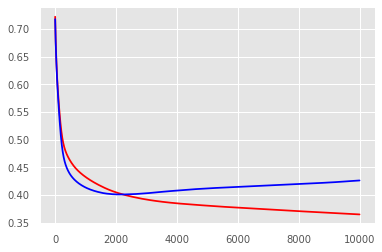

In [142]:
# Printăm comparativ cu roșu loss-ul de pe setul de validare și cu albastru loss-ul de pe setul de validare.
plt.plot(losses, "r-", test_losses, "b-")

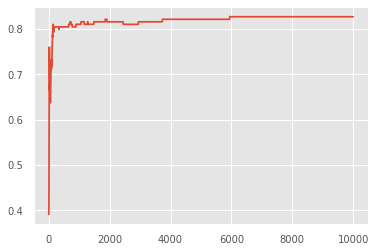

In [143]:
plt.plot(accuracies)

In [144]:
def try_a_single_example_with_the_network(index_from_the_validation_set):
  with torch.no_grad():
    pred_test = net(X_test[index_from_the_validation_set].view(1, -1))
    preds_y = torch.max(pred_test, 1)
    print(preds_y)

In [145]:
try_a_single_example_with_the_network(60)

torch.return_types.max(
values=tensor([1.6729]),
indices=tensor([0]))
